

> This notebook compares the current security configuration state of a sample Red Hat Enterprise Linux (RHEL) Virtual Machines (VMs) against the requirements of the Azure Security Benchmark (ASB) v3.



In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import json
import re
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Analysis Date: 2025-10-06 02:51:08


In [3]:
print("\n" + "="*80)
print("SECTION 1: RHEL SECURITY ADVISORY CRAWLER")
print("="*80)


SECTION 1: RHEL SECURITY ADVISORY CRAWLER


In [4]:
api_url = "https://access.redhat.com/hydra/rest/securitydata/cve.json"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'} # Using the suggested headers
keywords = ['red hat', 'rhel', 'redhat']
all_responses = []

for year in range(2010, 2026):
  try:
    params = {
        'product': 'Red Hat Enterprise Linux',
        'after': f'{year}-01-01',
        'before': f'{year}-12-31',
        'per_page': 100,
        'page': 1
        }
    response = requests.get(api_url, params=params, headers=headers, timeout=30)
    print(f"Status Code for year {year}: {response.status_code}")
    if response.status_code == 200:
      data = response.json()
      all_responses.extend(data)  # Add all CVEs to the list
    else:
        print(response.text) # or response.json() if the response is JSON
  except Exception as e:
    print(f"An error occurred for year {year}: {e}")
  finally:
    pass

Status Code for year 2010: 200
Status Code for year 2011: 200
Status Code for year 2012: 200
Status Code for year 2013: 200
Status Code for year 2014: 200
Status Code for year 2015: 200
Status Code for year 2016: 200
Status Code for year 2017: 200
Status Code for year 2018: 200
Status Code for year 2019: 200
Status Code for year 2020: 200
Status Code for year 2021: 200
Status Code for year 2022: 200
Status Code for year 2023: 200
Status Code for year 2024: 200
Status Code for year 2025: 200


In [5]:
file_path = "redhat_vulnerabilities.json"
with open(file_path, 'w') as f:
    json.dump(all_responses, f, indent=4)

print(f"Responses saved to {file_path}")

try:
  with open(file_path, 'r') as f:
    data = json.load(f)
    if data:
      df = pd.json_normalize(data)
      display(df.head())
    else:
       print("The JSON file is empty or does not contain a list of entries.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from the file '{file_path}'.")
except Exception as e:
    print(f"An error occurred: {e}")


Responses saved to redhat_vulnerabilities.json


,CVE,severity,public_date,advisories,bugzilla,bugzilla_description,cvss_score,cvss_scoring_vector,CWE,affected_packages,package_state,resource_url,cvss3_scoring_vector,cvss3_score
0,CVE-2010-4540,moderate,2010-12-31T00:00:00Z,"[RHSA-2011:0839, RHSA-2011:0838]",666793,Gimp: Stack-based buffer overflow in Lighting ...,5.1,AV:N/AC:H/Au:N/C:P/I:P/A:P,CWE-121,"[gimp-2:2.2.13-2.0.7.el5_6.2, gimp-2:2.6.9-4.e...",None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN
1,CVE-2010-4538,moderate,2010-12-31T00:00:00Z,[RHSA-2011:0013],666894,Wireshark: Stack-based array index error in EN...,6.8,AV:N/AC:M/Au:N/C:P/I:P/A:P,None,"[wireshark-0:1.0.15-1.el4_8.3, wireshark-0:1.0...",None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN
2,CVE-2010-4541,moderate,2010-12-31T00:00:00Z,"[RHSA-2011:0839, RHSA-2011:0837, RHSA-2011:0838]",703403,Gimp: Stack-based buffer overflow in SphereDes...,5.1,AV:N/AC:H/Au:N/C:P/I:P/A:P,CWE-121,"[gimp-1:2.0.5-7.0.7.el4.1, gimp-2:2.2.13-2.0.7...",None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN
3,CVE-2010-4542,moderate,2010-12-31T00:00:00Z,"[RHSA-2011:0839, RHSA-2011:0838]",703405,Gimp: Stack-based buffer overflow in Gfig plug-in,5.1,AV:N/AC:H/Au:N/C:P/I:P/A:P,CWE-121,"[gimp-2:2.2.13-2.0.7.el5_6.2, gimp-2:2.6.9-4.e...",None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN
4,CVE-2010-4543,moderate,2010-12-31T00:00:00Z,"[RHSA-2011:0839, RHSA-2011:0837, RHSA-2011:0838]",703407,Gimp: Heap-based buffer overflow in Paint Shop...,6.8,AV:N/AC:M/Au:N/C:P/I:P/A:P,CWE-122,"[gimp-1:2.0.5-7.0.7.el4.1, gimp-2:2.2.13-2.0.7...",None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN


In [6]:
print("\n" + "="*80)
print("SECTION 2: SECURITY TREND ANALYSIS")
print("="*80)


SECTION 2: SECURITY TREND ANALYSIS


In [7]:
def categorize_by_asb_domain(df: pd.DataFrame) -> pd.DataFrame:
  """
  Map CVEs to Azure Security Benchmark v3 domains based on keywords in description and packages.
  """
  print("\n🏷️  Mapping CVEs to ASB v3 Control Domains using enhanced keyword matching...")

  def map_to_asb(row):
    description = str(row['bugzilla_description']).lower()
    packages = str(row['affected_packages']).lower()

    # Combine description and packages for comprehensive keyword search
    text = description + " " + packages

    # Define expanded keywords for each domain
    domain_keywords = {
        'IM - Identity Management': ['openssh', 'pam', 'shadow-utils', 'sssd', 'krb5', 'auth', 'authentication', 'identity', 'user', 'account', 'login'],
        'PV - Posture & Vulnerability': ['kernel', 'glibc', 'openssl', 'systemd', 'vulnerability', 'patch', 'update', 'cve', 'security fix', 'flaw', 'overflow', 'buffer', 'memory', 'crash', 'qemu', 'wireshark', 'imagemagick'],
        'LT - Logging & Threat Detection': ['audit', 'rsyslog', 'auditd', 'log', 'logging', 'monitoring', 'alert', 'threat', 'detection', 'syslog'],
        'NS - Network Security': ['firewalld', 'iptables', 'nftables', 'network', 'firewall', 'tcp', 'udp', 'http', 'https', 'ssl', 'tls', 'socket', 'protocol'],
        'DP - Data Protection': ['cryptsetup', 'dm-crypt', 'gnupg', 'encrypt', 'decrypt', 'crypto', 'data', 'privacy', 'gpg', 'ssl', 'tls'],
    }

    # Check for keywords in the combined text
    for domain, keywords in domain_keywords.items():
        if any(keyword in text for keyword in keywords):
            return domain

    return 'Other'

  # Ensure necessary columns exist
  if 'bugzilla_description' not in df.columns or 'affected_packages' not in df.columns:
      print("Error: Required columns 'bugzilla_description' or 'affected_packages' not found in DataFrame.")
      return df # Return original DataFrame if columns are missing


  df['asb_domain'] = df.apply(map_to_asb, axis=1)
  domain_counts = df['asb_domain'].value_counts()

  print("\nASB Domain Distribution (Enhanced Keyword Matching):")
  for domain, count in domain_counts.items():
    print(f"  {domain}: {count}")

  return df

In [8]:
categorize_by_asb_domain(df)


🏷️  Mapping CVEs to ASB v3 Control Domains using enhanced keyword matching...

ASB Domain Distribution (Enhanced Keyword Matching):
  PV - Posture & Vulnerability: 960
  Other: 460
  IM - Identity Management: 84
  NS - Network Security: 38
  LT - Logging & Threat Detection: 30
  DP - Data Protection: 28


,CVE,severity,public_date,advisories,bugzilla,bugzilla_description,cvss_score,cvss_scoring_vector,CWE,affected_packages,package_state,resource_url,cvss3_scoring_vector,cvss3_score,asb_domain
0,CVE-2010-4540,moderate,2010-12-31T00:00:00Z,"[RHSA-2011:0839, RHSA-2011:0838]",666793,Gimp: Stack-based buffer overflow in Lighting ...,5.1,AV:N/AC:H/Au:N/C:P/I:P/A:P,CWE-121,"[gimp-2:2.2.13-2.0.7.el5_6.2, gimp-2:2.6.9-4.e...",None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN,PV - Posture & Vulnerability
1,CVE-2010-4538,moderate,2010-12-31T00:00:00Z,[RHSA-2011:0013],666894,Wireshark: Stack-based array index error in EN...,6.8,AV:N/AC:M/Au:N/C:P/I:P/A:P,None,"[wireshark-0:1.0.15-1.el4_8.3, wireshark-0:1.0...",None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN,PV - Posture & Vulnerability
2,CVE-2010-4541,moderate,2010-12-31T00:00:00Z,"[RHSA-2011:0839, RHSA-2011:0837, RHSA-2011:0838]",703403,Gimp: Stack-based buffer overflow in SphereDes...,5.1,AV:N/AC:H/Au:N/C:P/I:P/A:P,CWE-121,"[gimp-1:2.0.5-7.0.7.el4.1, gimp-2:2.2.13-2.0.7...",None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN,PV - Posture & Vulnerability
3,CVE-2010-4542,moderate,2010-12-31T00:00:00Z,"[RHSA-2011:0839, RHSA-2011:0838]",703405,Gimp: Stack-based buffer overflow in Gfig plug-in,5.1,AV:N/AC:H/Au:N/C:P/I:P/A:P,CWE-121,"[gimp-2:2.2.13-2.0.7.el5_6.2, gimp-2:2.6.9-4.e...",None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN,PV - Posture & Vulnerability
4,CVE-2010-4543,moderate,2010-12-31T00:00:00Z,"[RHSA-2011:0839, RHSA-2011:0837, RHSA-2011:0838]",703407,Gimp: Heap-based buffer overflow in Paint Shop...,6.8,AV:N/AC:M/Au:N/C:P/I:P/A:P,CWE-122,"[gimp-1:2.0.5-7.0.7.el4.1, gimp-2:2.2.13-2.0.7...",None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN,PV - Posture & Vulnerability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,CVE-2023-53528,moderate,2025-10-01T00:00:00Z,[],2400748,kernel: RDMA/rxe: Fix unsafe drain work queue ...,NaN,None,None,[],None,https://access.redhat.com/hydra/rest/securityd...,CVSS:3.1/AV:L/AC:H/PR:L/UI:N/S:U/C:H/I:H/A:H,7.0,PV - Posture & Vulnerability
1596,CVE-2023-53479,important,2025-10-01T00:00:00Z,[],2400749,kernel: cxl/acpi: Fix a use-after-free in cxl_...,NaN,None,None,[],None,https://access.redhat.com/hydra/rest/securityd...,CVSS:3.1/AV:L/AC:H/PR:L/UI:N/S:U/C:H/I:H/A:H,7.0,PV - Posture & Vulnerability
1597,CVE-2022-50426,moderate,2025-10-01T00:00:00Z,[],2400750,kernel: remoteproc: imx_dsp_rproc: Add mutex p...,NaN,None,None,[],None,https://access.redhat.com/hydra/rest/securityd...,CVSS:3.1/AV:L/AC:H/PR:L/UI:N/S:U/C:H/I:H/A:H,7.0,PV - Posture & Vulnerability
1598,CVE-2022-50427,low,2025-10-01T00:00:00Z,[],2400751,kernel: ALSA: ac97: fix possible memory leak i...,NaN,None,None,[],None,https://access.redhat.com/hydra/rest/securityd...,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:N/I:N/A:H,5.5,PV - Posture & Vulnerability


In [9]:
# Filter the DataFrame for entries categorized as 'Other'
other_cves_df = df[df['asb_domain'] == 'Other']

print(f"\nExamining {len(other_cves_df)} CVEs in the 'Other' category:")

# Display the description and affected packages for a sample of these CVEs
# Displaying all might be too long, so we'll show the first 20
if not other_cves_df.empty:
    display(other_cves_df[['CVE', 'bugzilla_description', 'affected_packages']].head(20))
else:
    print("No CVEs found in the 'Other' category.")


Examining 460 CVEs in the 'Other' category:


,CVE,bugzilla_description,affected_packages
6,CVE-2010-4645,php: hang on numeric value 2.2250738585072011e...,"[php-0:5.3.2-6.el6_0.1, php53-0:5.3.3-1.el5_6.1]"
7,CVE-2010-4666,Libarchive multiple security issues,[]
8,CVE-2011-1777,Libarchive multiple security issues,[libarchive-0:2.8.3-3.el6_1]
9,CVE-2011-1778,Libarchive multiple security issues,[libarchive-0:2.8.3-3.el6_1]
10,CVE-2011-1779,Libarchive multiple security issues,[]
15,CVE-2010-3906,(gitweb): XSS due to missing escaping of HTML ...,[git-0:1.7.1-2.el6_0.1]
19,CVE-2010-4578,WebKit: Stale SVG pointer in Cursors DOM,[]
34,CVE-2010-3771,Mozilla Chrome privilege escalation with windo...,"[xulrunner-0:1.9.2.13-3.el5, xulrunner-0:1.9.2..."
36,CVE-2010-3768,Mozilla add support for OTS font sanitizer (MF...,"[xulrunner-0:1.9.2.13-3.el5, xulrunner-0:1.9.2..."
38,CVE-2010-3766,Mozilla use-after-free error with nsDOMAttribu...,"[xulrunner-0:1.9.2.13-3.el5, xulrunner-0:1.9.2..."


In [10]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)


def analyze_term_frequency(df: pd.DataFrame, column: str, num_terms: int = 20):
    """
    Analyzes the frequency of terms in a specified column of a DataFrame.
    """
    if df.empty or column not in df.columns:
        print(f"⚠️ DataFrame is empty or column '{column}' not found.")
        return

    text = ' '.join(df[column].astype(str).tolist()).lower()
    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and len(word) > 1]

    # Count term frequency
    term_counts = Counter(filtered_words)

    print(f"\nTop {num_terms} terms in '{column}' for 'Other' CVEs:")
    for term, count in term_counts.most_common(num_terms):
        print(f"  {term}: {count}")

# Analyze term frequency in descriptions
analyze_term_frequency(other_cves_df, 'bugzilla_description')

# Analyze term frequency in affected packages
analyze_term_frequency(other_cves_df, 'affected_packages')


Top 20 terms in 'bugzilla_description' for 'Other' CVEs:
  code: 71
  execution: 64
  mozilla: 60
  multiple: 45
  issues: 45
  function: 44
  useafterfree: 42
  fixed: 38
  mfsa: 37
  dos: 37
  flashplugin: 37
  via: 36
  pointer: 30
  outofbounds: 30
  read: 28
  null: 28
  dereference: 25
  denial: 24
  service: 24
  arbitrary: 23

Top 20 terms in 'affected_packages' for 'Other' CVEs:
  flashplugin01122025591el67: 20
  flashplugin01122025591el5: 20
  flashplugin024001861el68: 17
  webkitgtk4024832el79: 12
  chromiumbrowser07103578801el610: 10
  thunderbird024201el65: 6
  thunderbird024202el510: 6
  firefox024201el65: 6
  firefox024201el510: 6
  webkit2gtk3023461el8: 6
  thunderbird091403el79: 6
  thunderbird091402el82: 6
  thunderbird091402el84: 6
  thunderbird091402el85: 6
  thunderbird091402el81: 6
  thunderbird0115601el84: 6
  thunderbird0115601el93: 6
  thunderbird0115601el86: 6
  thunderbird0115601el89: 6
  thunderbird0115601el79: 6


In [11]:
# Drop the specified columns
columns_to_drop = ['asb_domain_gemini', 'asb_domain_gpt']
df = df.drop(columns=columns_to_drop, errors='ignore') # Use errors='ignore' in case columns don't exist

# Display the columns of the updated DataFrame to confirm
print("Updated DataFrame columns:")
print(df.columns)

Updated DataFrame columns:
Index(['CVE', 'severity', 'public_date', 'advisories', 'bugzilla',
       'bugzilla_description', 'cvss_score', 'cvss_scoring_vector', 'CWE',
       'affected_packages', 'package_state', 'resource_url',
       'cvss3_scoring_vector', 'cvss3_score', 'asb_domain'],
      dtype='object')


In [12]:
df.to_csv("cve_with_asb_domains.csv", index=False)
print("Saved to cve_with_asb_domains.csv")

Saved to cve_with_asb_domains.csv


In [13]:
print("\n" + "="*80)
print("SECTION 3: VISUALIZE SECURITY TREND")
print("="*80)


SECTION 3: VISUALIZE SECURITY TREND


In [14]:
def analyze_security_trends(df: pd.DataFrame):
    """
    Analyze and visualize security trends over time
    """

    if df.empty:
        print("⚠️  No data available for analysis")
        return

    # Convert 'public_date' to datetime objects
    df['public_date'] = pd.to_datetime(df['public_date'], errors='coerce')

    # Drop rows where 'public_date' could not be parsed
    df.dropna(subset=['public_date'], inplace=True)

    if df.empty:
        print("⚠️  No valid date data available for analysis after processing.")
        return

    # Convert 'cvss3_score' to numeric, coercing errors
    df['cvss3_score'] = pd.to_numeric(df['cvss3_score'], errors='coerce')


    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('RHEL Security Advisory Trends (Last 10 Years)', fontsize=16, fontweight='bold')

    # 1. CVEs by Severity over Time
    severity_order = ['Critical', 'High', 'Medium', 'Low', 'Unknown']
    df['year_month'] = df['public_date'].dt.to_period('M')
    severity_timeline = df.groupby(['year_month', 'severity']).size().unstack(fill_value=0)

    severity_timeline.plot(kind='area', stacked=True, ax=axes[0, 0],
                           color=['#d32f2f', '#f57c00', '#fbc02d', '#689f38', '#cccccc'])
    axes[0, 0].set_title('CVEs by Severity Timeline', fontweight='bold')
    axes[0, 0].set_xlabel('Time Period')
    axes[0, 0].set_ylabel('Number of CVEs')
    axes[0, 0].legend(title='Severity', bbox_to_anchor=(1.05, 1))
    axes[0, 0].grid(True, alpha=0.3)

    # 2. ASB Domain Distribution
    asb_counts = df['asb_domain'].value_counts()
    colors = plt.cm.Set3(range(len(asb_counts)))
    axes[0, 1].pie(asb_counts.values, labels=asb_counts.index, autopct='%1.1f%%',
                   colors=colors, startangle=90)
    axes[0, 1].set_title('Distribution by ASB v3 Control Domain', fontweight='bold')
    # axes[0, 1].set_title('ASB v3 Control Domain (Data Needed)', fontweight='bold') # Remove placeholder title
    # axes[0, 1].text(0.5, 0.5, 'Data for ASB Domain \nnot available in DataFrame', # Remove placeholder text
    #                 horizontalalignment='center', verticalalignment='center',
    #                 transform=axes[0, 1].transAxes, fontsize=12, color='gray')
    # axes[0, 1].axis('off') # Remove placeholder axis off


    # 3. CVSS Score Distribution
    # Need to handle potential NaN values in cvss3_score
    df['cvss3_score'].dropna().hist(bins=20, ax=axes[1, 0], color='#1976d2', edgecolor='black')
    axes[1, 0].axvline(df['cvss3_score'].mean(), color='red', linestyle='--',
                       label=f'Mean: {df["cvss3_score"].mean():.2f}') # Corrected f-string format
    axes[1, 0].set_title('CVSS v3 Score Distribution', fontweight='bold')
    axes[1, 0].set_xlabel('CVSS Score')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Top 10 Affected Package Families
    # Ensure 'affected_packages' is string type and handle missing values
    df['affected_packages'] = df['affected_packages'].astype(str)

    # Handle empty lists or missing values in 'affected_packages'
    def extract_package_family(package_list_str):
        if pd.isna(package_list_str) or package_list_str == '[]' or package_list_str == '':
            return 'Unknown Package'
        # Attempt to parse the string representation of a list
        try:
            package_list = eval(package_list_str)
            if isinstance(package_list, list) and package_list:
                return package_list[0].strip()
            else:
                return 'Unknown Package'
        except:
            return 'Unknown Package' # Handle potential errors during eval

    df['package_family'] = df['affected_packages'].apply(extract_package_family)

    # Filter out 'Unknown Package' before getting top 10
    known_packages_df = df[df['package_family'] != 'Unknown Package']
    top_packages = known_packages_df['package_family'].value_counts().head(10)


    top_packages.plot(kind='barh', ax=axes[1, 1], color='#43a047')
    axes[1, 1].set_title('Top 10 Most Affected Package Families (Excluding Unknown)', fontweight='bold')
    axes[1, 1].set_xlabel('Number of CVEs')
    axes[1, 1].invert_yaxis()

    plt.tight_layout()
    plt.savefig('rhel_security_trends.png', dpi=300, bbox_inches='tight')
    print("\n✓ Visualization saved to: rhel_security_trends.png")
    plt.show()

    # Statistical Summary
    print("\n📈 Statistical Summary:")
    print(f"  Total CVEs analyzed: {len(df)}")
    # Check if df is not empty before accessing min/max date
    if not df.empty:
        print(f"  Date range: {df['public_date'].min().strftime('%Y-%m-%d')} to {df['public_date'].max().strftime('%Y-%m-%d')}")
    else:
        print("  Date range: No valid dates available for analysis.")

    # Handle potential NaN values in mean/median calculations
    print(f"  Average CVSS Score: {df['cvss3_score'].mean():.2f}" if not df['cvss3_score'].isna().all() else "  Average CVSS Score: N/A")
    print(f"  Median CVSS Score: {df['cvss3_score'].median():.2f}" if not df['cvss3_score'].isna().all() else "  Median CVSS Score: N/A")


    print(f"\n  Severity Breakdown:")
    severity_counts = df['severity'].value_counts()
    if not severity_counts.empty:
      for severity, count in severity_counts.items():
          print(f"    {severity}: {count} ({count/len(df)*100:.1f}%)")
    else:
      print("    No severity data available.")


✓ Visualization saved to: rhel_security_trends.png


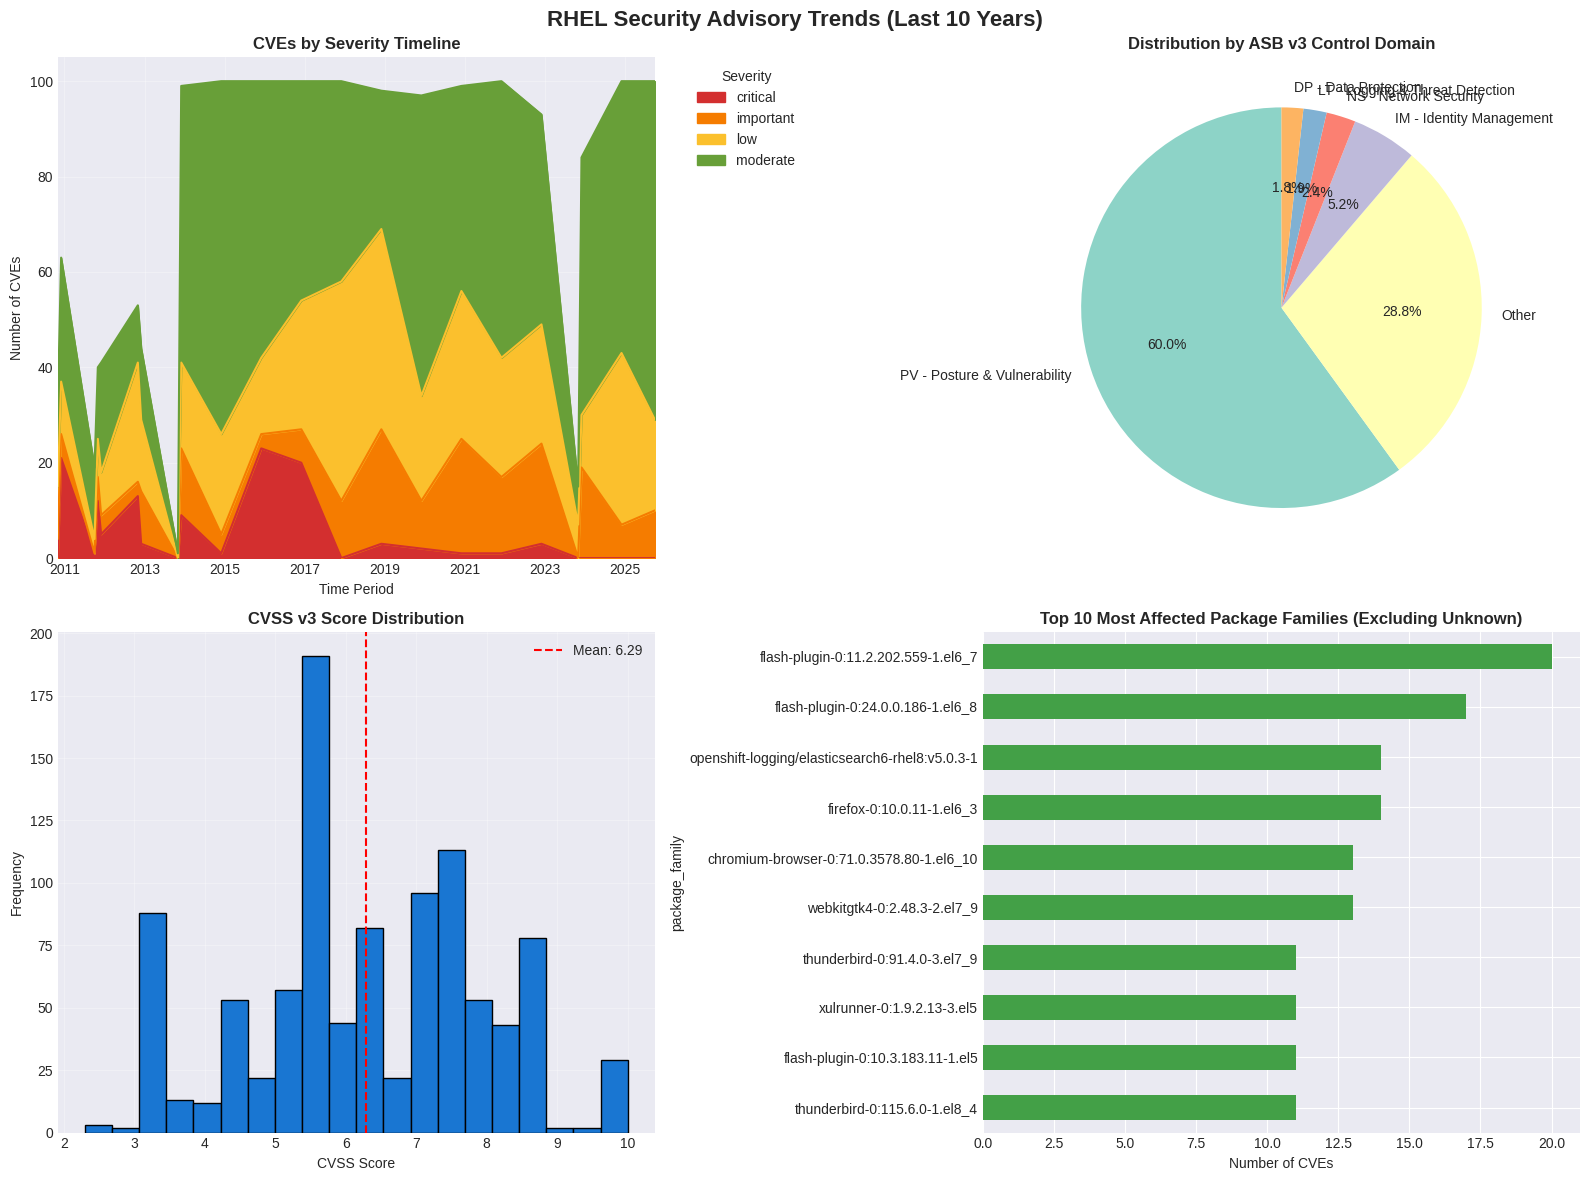


📈 Statistical Summary:
  Total CVEs analyzed: 1600
  Date range: 2010-11-10 to 2025-10-01
  Average CVSS Score: 6.29
  Median CVSS Score: 6.20

  Severity Breakdown:
    moderate: 829 (51.8%)
    low: 428 (26.8%)
    important: 203 (12.7%)
    critical: 118 (7.4%)


In [15]:
analyze_security_trends(df)

In [16]:
# Filter the DataFrame to include only 'PV - Posture & Vulnerability' domain
df_pv_only = df[df['asb_domain'] == 'PV - Posture & Vulnerability'].copy()

print(f"DataFrame shape for PV domain only: {df_pv_only.shape}")

# Define a mapping for severity to enable meaningful sorting
severity_order = {'Critical': 4, 'Important': 3, 'Moderate': 2, 'Low': 1, 'Unknown': 0}
df_pv_only['severity_rank'] = df_pv_only['severity'].map(severity_order)

# Sort the DataFrame by severity rank (descending) and public_date (descending)
# Drop the temporary 'severity_rank' column after sorting
df_pv_ranked = df_pv_only.sort_values(by=['severity_rank', 'public_date'], ascending=[False, False]).drop(columns=['severity_rank'])

print("\nTop CVEs in 'PV - Posture & Vulnerability' domain, ranked by Severity and Date:")
# Display the relevant columns for the top ranked CVEs
display(df_pv_ranked[['CVE', 'severity', 'public_date', 'bugzilla_description', 'affected_packages']].head(20))

DataFrame shape for PV domain only: (960, 17)

Top CVEs in 'PV - Posture & Vulnerability' domain, ranked by Severity and Date:


,CVE,severity,public_date,bugzilla_description,affected_packages
1503,CVE-2025-39903,moderate,2025-10-01 00:00:00+00:00,kernel: of_numa: fix uninitialized memory node...,[]
1504,CVE-2025-39902,moderate,2025-10-01 00:00:00+00:00,kernel: mm/slub: avoid accessing metadata when...,[]
1505,CVE-2025-39913,low,2025-10-01 00:00:00+00:00,kernel: tcp_bpf: Call sk_msg_free() when tcp_b...,[]
1506,CVE-2025-39894,moderate,2025-10-01 00:00:00+00:00,kernel: netfilter: br_netfilter: do not check ...,[]
1507,CVE-2025-39892,moderate,2025-10-01 00:00:00+00:00,kernel: ASoC: soc-core: care NULL dirver name ...,[]
1508,CVE-2025-39898,moderate,2025-10-01 00:00:00+00:00,kernel: e1000e: fix heap overflow in e1000_set...,[]
1509,CVE-2025-39915,moderate,2025-10-01 00:00:00+00:00,kernel: net: phy: transfer phy_config_inband()...,[]
1510,CVE-2025-39895,moderate,2025-10-01 00:00:00+00:00,kernel: sched: Fix sched_numa_find_nth_cpu() i...,[]
1511,CVE-2025-39914,moderate,2025-10-01 00:00:00+00:00,kernel: tracing: Silence warning when chunk al...,[]
1512,CVE-2025-39901,moderate,2025-10-01 00:00:00+00:00,kernel: i40e: remove read access to debugfs files,[]


In [17]:
# Define a mapping for severity to enable meaningful sorting
severity_order = {'Critical': 4, 'Important': 3, 'Moderate': 2, 'Low': 1, 'Unknown': 0}
df['severity_rank'] = df['severity'].map(severity_order)

# Sort the entire DataFrame by severity rank (descending) and public_date (descending)
# Drop the temporary 'severity_rank' column after sorting
df_ranked_overall = df.sort_values(by=['severity_rank', 'public_date'], ascending=[False, False]).drop(columns=['severity_rank'])

print("\nTop CVEs overall, ranked by Severity and Date:")
# Display the relevant columns for the top ranked CVEs
display(df_ranked_overall[['CVE', 'severity', 'public_date', 'bugzilla_description', 'affected_packages', 'asb_domain']].head(20))


Top CVEs overall, ranked by Severity and Date:


,CVE,severity,public_date,bugzilla_description,affected_packages,asb_domain
1500,CVE-2025-11226,moderate,2025-10-01 07:26:12+00:00,ch.qos.logback/logback-core: Conditional abitr...,[],LT - Logging & Threat Detection
1501,CVE-2025-59681,important,2025-10-01 00:00:00+00:00,django: Potential SQL injection in QuerySet.an...,[],Other
1502,CVE-2025-59682,important,2025-10-01 00:00:00+00:00,django: Potential partial directory-traversal ...,[],Other
1503,CVE-2025-39903,moderate,2025-10-01 00:00:00+00:00,kernel: of_numa: fix uninitialized memory node...,[],PV - Posture & Vulnerability
1504,CVE-2025-39902,moderate,2025-10-01 00:00:00+00:00,kernel: mm/slub: avoid accessing metadata when...,[],PV - Posture & Vulnerability
1505,CVE-2025-39913,low,2025-10-01 00:00:00+00:00,kernel: tcp_bpf: Call sk_msg_free() when tcp_b...,[],PV - Posture & Vulnerability
1506,CVE-2025-39894,moderate,2025-10-01 00:00:00+00:00,kernel: netfilter: br_netfilter: do not check ...,[],PV - Posture & Vulnerability
1507,CVE-2025-39892,moderate,2025-10-01 00:00:00+00:00,kernel: ASoC: soc-core: care NULL dirver name ...,[],PV - Posture & Vulnerability
1508,CVE-2025-39898,moderate,2025-10-01 00:00:00+00:00,kernel: e1000e: fix heap overflow in e1000_set...,[],PV - Posture & Vulnerability
1509,CVE-2025-39915,moderate,2025-10-01 00:00:00+00:00,kernel: net: phy: transfer phy_config_inband()...,[],PV - Posture & Vulnerability


In [18]:
# Create a more complex dummy DataFrame to represent asset package inventory
# This version explicitly includes some known vulnerable packages from the CVE data

# Get a list of unique affected package strings from the CVE data
# Filter out empty or invalid entries
affected_packages_list = []
for packages_str in df['affected_packages'].dropna().tolist():
    try:
        # Safely evaluate the string representation of the list
        package_list = eval(packages_str)
        if isinstance(package_list, list):
            affected_packages_list.extend(package_list)
    except:
        # Ignore entries that cannot be evaluated as lists
        pass

# Extract unique package name and a potentially vulnerable version
vulnerable_package_samples = {}
for package_str in affected_packages_list:
    match = re.match(r'^(.+)-(\d.*)$', package_str)
    if match:
        package_name = match.group(1)
        package_version = match.group(2)
        # Store one vulnerable version per package name found
        if package_name not in vulnerable_package_samples:
            vulnerable_package_samples[package_name] = package_version

# Generate a mix of random and known vulnerable packages for assets
asset_data = []
asset_ids = [f'asset{i}' for i in range(1, 11)] # 10 assets

for asset_id in asset_ids:
    num_packages = np.random.randint(10, 20) # Each asset has 10-20 packages
    packages_for_asset = []

    # Include a few known vulnerable packages in some assets
    num_vulnerable_to_include = np.random.randint(0, min(5, len(vulnerable_package_samples))) # Include 0-5 vulnerable packages
    vulnerable_package_names = np.random.choice(list(vulnerable_package_samples.keys()), size=num_vulnerable_to_include, replace=False)

    for pkg_name in vulnerable_package_names:
        asset_data.append({
            'Asset ID': asset_id,
            'Package Name': pkg_name,
            'Package Version': vulnerable_package_samples[pkg_name] # Use the known vulnerable version
        })
        packages_for_asset.append(pkg_name)

    # Fill the rest with random packages, avoiding duplicates within the asset
    all_possible_packages = ['kernel', 'openssl', 'systemd', 'firewalld', 'bash', 'tar', 'vim', 'python', 'php', 'mysql-server', 'httpd', 'ssh', 'glibc', 'firefox', 'thunderbird', 'qemu', 'wireshark', 'imagemagick'] # Expanded list
    random_packages_count = num_packages - len(packages_for_asset)
    if random_packages_count > 0:
        random_packages = np.random.choice([pkg for pkg in all_possible_packages if pkg not in packages_for_asset], size=random_packages_count, replace=True)
        for pkg_name in random_packages:
             # Generate a more varied, potentially older version
            random_version = f'{np.random.randint(2, 5)}.{np.random.randint(0, 20)}.{np.random.randint(0, 100)}-{np.random.randint(1, 50)}.el{np.random.randint(7, 9)}'
            asset_data.append({
                'Asset ID': asset_id,
                'Package Name': pkg_name,
                'Package Version': random_version
            })


df_assets = pd.DataFrame(asset_data)

# Display the first few rows
display(df_assets.head())

# Print column names and data types
df_assets.info()

,Asset ID,Package Name,Package Version
0,asset1,jbcs-httpd24-mod_jk-0:1.2.48,16.redhat_1.jbcs.el7
1,asset1,python,3.1.65-44.el8
2,asset1,bash,3.10.26-36.el8
3,asset1,php,2.10.5-1.el7
4,asset1,thunderbird,2.13.53-36.el7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Asset ID         166 non-null    object
 1   Package Name     166 non-null    object
 2   Package Version  166 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


In [19]:
print("Columns in df:")
print(df.columns)
print("\nColumns in df_assets:")
print(df_assets.columns)

Columns in df:
Index(['CVE', 'severity', 'public_date', 'advisories', 'bugzilla',
       'bugzilla_description', 'cvss_score', 'cvss_scoring_vector', 'CWE',
       'affected_packages', 'package_state', 'resource_url',
       'cvss3_scoring_vector', 'cvss3_score', 'asb_domain', 'year_month',
       'package_family', 'severity_rank'],
      dtype='object')

Columns in df_assets:
Index(['Asset ID', 'Package Name', 'Package Version'], dtype='object')


In [20]:
def check_vulnerable_assets(df_assets: pd.DataFrame, df_cve: pd.DataFrame) -> pd.DataFrame:
    """
    Identifies assets in df_assets that have packages matching vulnerable packages
    listed in the CVE data within df_cve.

    Args:
        df_assets: DataFrame containing asset package inventory.
        df_cve: DataFrame containing CVE data with affected packages.

    Returns:
        DataFrame containing information about vulnerable assets and the associated CVEs.
    """
    if df_assets.empty:
        print("⚠️  df_assets is empty. Cannot check for vulnerable assets.")
        return pd.DataFrame()
    if df_cve.empty:
        print("⚠️  df_cve is empty. Cannot check for vulnerable assets.")
        return pd.DataFrame()

    print("ℹ️  Checking for vulnerable assets...")

    # Placeholder for the logic to identify vulnerable assets
    # This will be implemented in subsequent steps
    vulnerable_assets_df = pd.DataFrame()

    return vulnerable_assets_df

In [21]:
vulnerable_assets_details = []

for index, asset_row in df_assets.iterrows():
    asset_id = asset_row['Asset ID']
    asset_package_name = asset_row['Package Name']
    asset_package_version = asset_row['Package Version']

    # Iterate through the extracted vulnerable package information from df
    for vulnerable_package_name, vulnerable_package_version in vulnerable_package_samples.items():
        # Compare the package name from df_assets with the package name from the vulnerable package information
        if asset_package_name == vulnerable_package_name:
            # For simplicity, we'll consider it vulnerable if the package name matches.
            # A more sophisticated check would involve version comparison.
            # For this subtask, matching the package name is sufficient.
            vulnerable_assets_details.append({
                'Asset ID': asset_id,
                'Vulnerable Package Name': asset_package_name,
                'Asset Package Version': asset_package_version,
                'Known Vulnerable Version (from CVE data)': vulnerable_package_version
            })



In [22]:
vulnerable_assets_df = pd.DataFrame(vulnerable_assets_details)

if not vulnerable_assets_df.empty:
    print("\nVulnerable Assets Identified:")
    display(vulnerable_assets_df.head())
else:
    print("\nNo vulnerable assets found based on package name matching.")


Vulnerable Assets Identified:


,Asset ID,Vulnerable Package Name,Asset Package Version,Known Vulnerable Version (from CVE data)
0,asset1,jbcs-httpd24-mod_jk-0:1.2.48,16.redhat_1.jbcs.el7,16.redhat_1.jbcs.el7
1,asset2,rh-sso-7/sso75-openshift-rhel8:7.5,17,17
2,asset2,openshift-serverless-1/serving-autoscaler-rhel...,2,2
3,asset2,jboss-as-naming-0:7.5.24,2.Final_redhat_00001.1.ep6.el7,2.Final_redhat_00001.1.ep6.el7
4,asset3,openshift4/ose-ibm-cloud-controller-manager-rh...,202401261531.p0.g19e64d5.assembly.stream,202401261531.p0.g19e64d5.assembly.stream


In [23]:
from packaging import version
import re

def is_version_vulnerable(asset_version, vulnerable_version):
    """
    Compares an asset's package version against a known vulnerable version.
    Returns True if the asset version is less than or equal to the vulnerable version.
    Handles potential parsing errors by returning False.
    """
    try:
        # Attempt to parse versions using packaging.version
        # This handles many standard version formats
        asset_v = version.parse(str(asset_version))
        vulnerable_v = version.parse(str(vulnerable_version))
        return asset_v <= vulnerable_v
    except version.InvalidVersion:
        # If packaging.version fails, try a more robust string comparison as a fallback
        # This attempts to extract numeric parts and compare them
        print(f"Warning: Could not parse version string with packaging.version: {asset_version} or {vulnerable_version}. Attempting advanced string comparison.")
        # Extract sequences of digits and dots
        asset_parts = re.findall(r'\d+(\.\d+)*', str(asset_version))
        vulnerable_parts = re.findall(r'\d+(\.\d+)*', str(vulnerable_version))

        # Convert extracted parts to tuples of integers for comparison
        def convert_to_tuple(parts_list):
            if not parts_list:
                return (0,) # Return a default tuple for comparison if no numeric parts found
            # Take the first matched sequence and split by dot, convert to int
            # Ensure parts_list[0] is not empty and parts_list[0][0] is not empty
            if not parts_list[0] or not parts_list[0][0]:
                 return (0,)
            return tuple(int(part) for part in parts_list[0][0].split('.') if part.isdigit())

        asset_tuple = convert_to_tuple(asset_parts)
        vulnerable_tuple = convert_to_tuple(vulnerable_parts)

        # Compare the tuples
        return asset_tuple <= vulnerable_tuple

if not vulnerable_assets_df.empty:
    # Apply the version comparison logic
    vulnerable_assets_df['is_vulnerable'] = vulnerable_assets_df.apply(
        lambda row: is_version_vulnerable(
            row['Asset Package Version'],
            row['Known Vulnerable Version (from CVE data)']
        ),
        axis=1
    )

    # Filter for truly vulnerable assets
    confirmed_vulnerable_assets_df = vulnerable_assets_df[vulnerable_assets_df['is_vulnerable']].copy()

    print("\nConfirmed Vulnerable Assets:")
    if not confirmed_vulnerable_assets_df.empty:
        display(confirmed_vulnerable_assets_df[['Asset ID', 'Vulnerable Package Name', 'Asset Package Version', 'Known Vulnerable Version (from CVE data)']])
    else:
        print("No confirmed vulnerable assets found based on version comparison.")
else:
    print("\nNo potentially vulnerable assets were identified in the previous step.")


Confirmed Vulnerable Assets:


,Asset ID,Vulnerable Package Name,Asset Package Version,Known Vulnerable Version (from CVE data)
0,asset1,jbcs-httpd24-mod_jk-0:1.2.48,16.redhat_1.jbcs.el7,16.redhat_1.jbcs.el7
1,asset2,rh-sso-7/sso75-openshift-rhel8:7.5,17,17
2,asset2,openshift-serverless-1/serving-autoscaler-rhel...,2,2
3,asset2,jboss-as-naming-0:7.5.24,2.Final_redhat_00001.1.ep6.el7,2.Final_redhat_00001.1.ep6.el7
4,asset3,openshift4/ose-ibm-cloud-controller-manager-rh...,202401261531.p0.g19e64d5.assembly.stream,202401261531.p0.g19e64d5.assembly.stream
5,asset4,jws5-tomcat-0:9.0.30,3.redhat_4.1.el8jws,3.redhat_4.1.el8jws
6,asset4,tfm-rubygem-hammer_cli_foreman_discovery-0:1.0.1,1.el7sat,1.el7sat
7,asset4,openshift4/ose-cluster-config-rhel9-operator:v...,202402142137.p0.gcc1fb20.assembly.stream.el9,202402142137.p0.gcc1fb20.assembly.stream.el9
8,asset5,nss-0:3.53.1,3.el7_9,3.el7_9
9,asset5,eap7-jbossws-cxf-0:5.1.8,1.Final_redhat_1.1.ep7.el7,1.Final_redhat_1.1.ep7.el7


In [24]:
# Extract the base package name from the 'Vulnerable Package Name' for merging
def extract_main_package_name(package_name):
    if isinstance(package_name, str):
        # Remove versioning and release information for a cleaner package name
        # This regex attempts to capture the part before versioning starts (digits, colons, hyphens)
        match = re.match(r'([^0-9:\-]+)', package_name)
        if match:
            return match.group(1).strip()
        # Fallback for names that start with digits or colons, or have unusual formats
        parts = re.split(r'[:\-]', package_name)
        if parts:
            return parts[0].strip()
    return None

confirmed_vulnerable_assets_df['main_package_name'] = confirmed_vulnerable_assets_df['Vulnerable Package Name'].apply(extract_main_package_name)

# Ensure the 'package_family' column in df is also in a comparable format
# We already created 'package_family' in a previous step, but let's refine the extraction if needed
def extract_main_package_name_from_family(package_family):
     if isinstance(package_family, str):
        # Check if the family name is 'Unknown Package' or similar placeholders
        if package_family in ['Unknown Package', '', '[]', 'None']:
            return None
        # Use the same logic as above for consistency
        match = re.match(r'([^0-9:\-]+)', package_family)
        if match:
            return match.group(1).strip()
        parts = re.split(r'[:\-]', package_family)
        if parts:
            return parts[0].strip()
     return None

# Apply the refined extraction to the 'package_family' column in df
df['main_package_name'] = df['package_family'].apply(extract_main_package_name_from_family)


# Merge the confirmed vulnerable assets with the original CVE data
# We merge on the extracted main package name
assets_with_cves_df = pd.merge(
    confirmed_vulnerable_assets_df,
    df[['CVE', 'severity', 'bugzilla_description', 'main_package_name']],
    on='main_package_name',
    how='left' # Use a left merge to keep all vulnerable assets and add matching CVEs
)

# Drop the temporary 'main_package_name' column from both dataframes if no longer needed
assets_with_cves_df = assets_with_cves_df.drop(columns=['main_package_name'])
df = df.drop(columns=['main_package_name'])


# Display the resulting DataFrame
print("\nAssets and their associated CVEs:")
display(assets_with_cves_df.head())

# Optional: Display a summary of how many CVEs affect each vulnerable asset
print("\nSummary of CVEs per Vulnerable Asset:")
cves_per_asset_summary = assets_with_cves_df.groupby('Asset ID')['CVE'].count().reset_index()
cves_per_asset_summary.rename(columns={'CVE': 'Number of Associated CVEs'}, inplace=True)
display(cves_per_asset_summary)


Assets and their associated CVEs:


,Asset ID,Vulnerable Package Name,Asset Package Version,Known Vulnerable Version (from CVE data),is_vulnerable,CVE,severity,bugzilla_description
0,asset1,jbcs-httpd24-mod_jk-0:1.2.48,16.redhat_1.jbcs.el7,16.redhat_1.jbcs.el7,True,CVE-2016-0736,moderate,httpd: Padding Oracle in Apache mod_session_cr...
1,asset1,jbcs-httpd24-mod_jk-0:1.2.48,16.redhat_1.jbcs.el7,16.redhat_1.jbcs.el7,True,CVE-2016-2161,moderate,httpd: DoS vulnerability in mod_auth_digest
2,asset1,jbcs-httpd24-mod_jk-0:1.2.48,16.redhat_1.jbcs.el7,16.redhat_1.jbcs.el7,True,CVE-2016-8743,moderate,httpd: Apache HTTP Request Parsing Whitespace ...
3,asset1,jbcs-httpd24-mod_jk-0:1.2.48,16.redhat_1.jbcs.el7,16.redhat_1.jbcs.el7,True,CVE-2020-8284,moderate,curl: FTP PASV command response can cause curl...
4,asset1,jbcs-httpd24-mod_jk-0:1.2.48,16.redhat_1.jbcs.el7,16.redhat_1.jbcs.el7,True,CVE-2020-8285,moderate,curl: Malicious FTP server can trigger stack o...



Summary of CVEs per Vulnerable Asset:


,Asset ID,Number of Associated CVEs
0,asset1,10
1,asset10,1
2,asset2,52
3,asset3,24
4,asset4,26
5,asset5,7
6,asset8,28


In [25]:
import datetime

# Merge assets_with_cves_df with df to get the public_date
# Use 'CVE' as the key for merging
assets_with_cves_df = pd.merge(
    assets_with_cves_df,
    df[['CVE', 'public_date']],
    on='CVE',
    how='left'
)

# Select the necessary columns from assets_with_cves_df
vulnerability_data_for_viz = assets_with_cves_df[['Asset ID', 'CVE', 'severity', 'public_date']].copy()

# Convert 'public_date' to datetime objects
vulnerability_data_for_viz['public_date'] = pd.to_datetime(vulnerability_data_for_viz['public_date'], errors='coerce')

# Display the first few rows and data types
print("Filtered data for visualization:")
display(vulnerability_data_for_viz.head())
print("\nData types:")
vulnerability_data_for_viz.info()

Filtered data for visualization:


,Asset ID,CVE,severity,public_date
0,asset1,CVE-2016-0736,moderate,2016-12-20 00:00:00+00:00
1,asset1,CVE-2016-2161,moderate,2016-12-20 00:00:00+00:00
2,asset1,CVE-2016-8743,moderate,2016-12-20 00:00:00+00:00
3,asset1,CVE-2020-8284,moderate,2020-12-09 08:00:00+00:00
4,asset1,CVE-2020-8285,moderate,2020-12-09 08:00:00+00:00



Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Asset ID     149 non-null    object             
 1   CVE          148 non-null    object             
 2   severity     148 non-null    object             
 3   public_date  148 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 4.8+ KB


In [26]:
import datetime

# Calculate the current date and time in UTC
current_date = datetime.datetime.now(datetime.timezone.utc)

# Calculate the age of each vulnerability in days
vulnerability_data_for_viz['vulnerability_age_days'] = (current_date - vulnerability_data_for_viz['public_date']).dt.days

# Display the head of the updated DataFrame
print("\nDataFrame with vulnerability age:")
display(vulnerability_data_for_viz.head())


DataFrame with vulnerability age:


,Asset ID,CVE,severity,public_date,vulnerability_age_days
0,asset1,CVE-2016-0736,moderate,2016-12-20 00:00:00+00:00,3212.0
1,asset1,CVE-2016-2161,moderate,2016-12-20 00:00:00+00:00,3212.0
2,asset1,CVE-2016-8743,moderate,2016-12-20 00:00:00+00:00,3212.0
3,asset1,CVE-2020-8284,moderate,2020-12-09 08:00:00+00:00,1761.0
4,asset1,CVE-2020-8285,moderate,2020-12-09 08:00:00+00:00,1761.0


In [27]:
# Create a pivot table for vulnerability age
age_pivot = vulnerability_data_for_viz.pivot_table(
    index='Asset ID',
    columns='CVE',
    values='vulnerability_age_days'
)

# Create a pivot table for severity
severity_pivot = vulnerability_data_for_viz.pivot_table(
    index='Asset ID',
    columns='CVE',
    values='severity',
    aggfunc=lambda x: ', '.join(x.unique()) # Aggregate multiple severities if an asset/CVE has duplicates
)

print("\nVulnerability Age Pivot Table Head:")
display(age_pivot.head())

print("\nSeverity Pivot Table Head:")
display(severity_pivot.head())


Vulnerability Age Pivot Table Head:


CVE,CVE-2012-3546,CVE-2013-6459,CVE-2016-0736,CVE-2016-10168,CVE-2016-10745,CVE-2016-2161,CVE-2016-7479,CVE-2016-8743,CVE-2016-9606,CVE-2016-9933,...,CVE-2022-40897,CVE-2022-43551,CVE-2022-45693,CVE-2023-39326,CVE-2023-46218,CVE-2023-46219,CVE-2023-48795,CVE-2023-49568,CVE-2023-6710,CVE-2023-6817
Asset ID,,,,,,,,,,,,,,,,,,,,,
asset1,NaN,NaN,3212.0,NaN,NaN,3212.0,NaN,3212.0,NaN,NaN,...,NaN,1020.0,NaN,NaN,NaN,669.0,NaN,NaN,664.0,NaN
asset10,NaN,4304.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asset2,4689.0,NaN,NaN,3215.0,NaN,NaN,3205.0,NaN,3217.0,3224.0,...,1019.0,NaN,NaN,670.0,669.0,NaN,NaN,652.0,NaN,658.0
asset3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,670.0,669.0,NaN,NaN,652.0,NaN,658.0
asset4,NaN,NaN,NaN,NaN,3203.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,670.0,669.0,NaN,NaN,652.0,NaN,658.0



Severity Pivot Table Head:


CVE,CVE-2012-3546,CVE-2013-6459,CVE-2016-0736,CVE-2016-10168,CVE-2016-10745,CVE-2016-2161,CVE-2016-7479,CVE-2016-8743,CVE-2016-9606,CVE-2016-9933,...,CVE-2022-40897,CVE-2022-43551,CVE-2022-45693,CVE-2023-39326,CVE-2023-46218,CVE-2023-46219,CVE-2023-48795,CVE-2023-49568,CVE-2023-6710,CVE-2023-6817
Asset ID,,,,,,,,,,,,,,,,,,,,,
asset1,NaN,NaN,moderate,NaN,NaN,moderate,NaN,moderate,NaN,NaN,...,NaN,moderate,NaN,NaN,NaN,moderate,NaN,NaN,low,NaN
asset10,NaN,moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asset2,important,NaN,NaN,moderate,NaN,NaN,moderate,NaN,moderate,low,...,moderate,NaN,NaN,moderate,moderate,NaN,NaN,important,NaN,important
asset3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,moderate,moderate,NaN,NaN,important,NaN,important
asset4,NaN,NaN,NaN,NaN,important,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,moderate,moderate,NaN,NaN,important,NaN,important


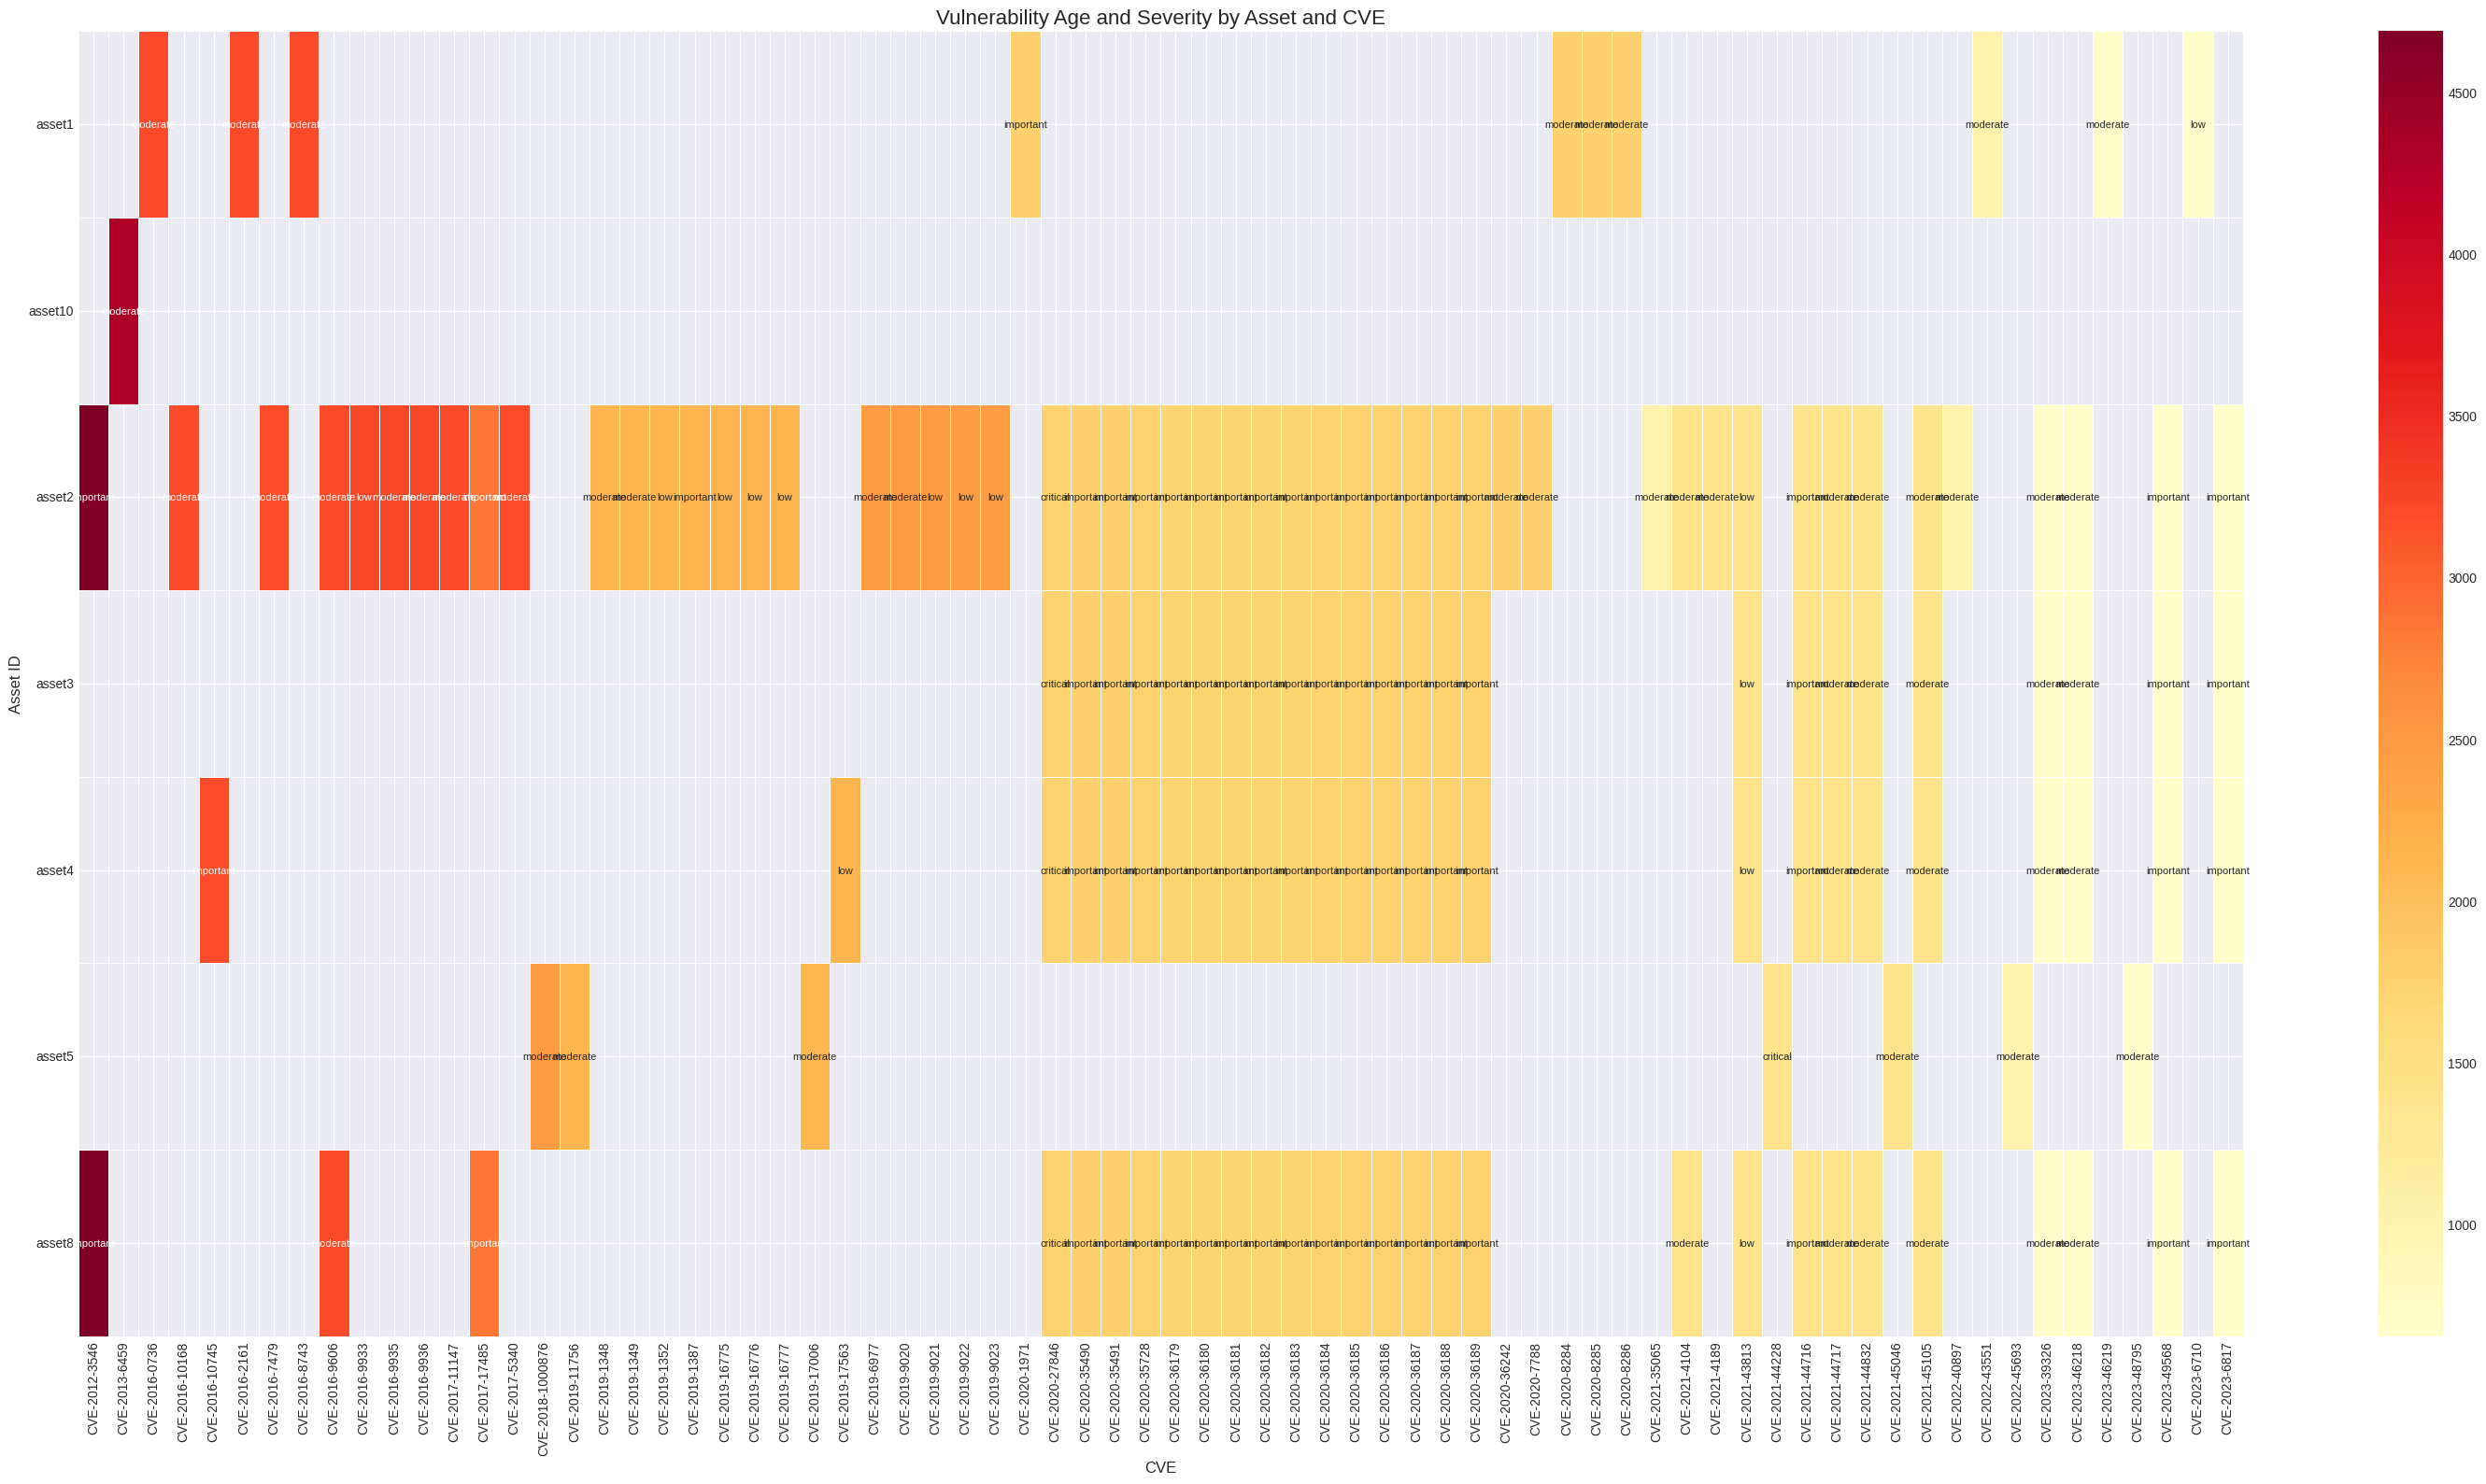

In [28]:
plt.figure(figsize=(30, 16)) # Increased figure size to provide more space
sns.heatmap(age_pivot, annot=severity_pivot, fmt="", cmap="YlOrRd", linewidths=.5, annot_kws={"size": 8})

plt.title("Vulnerability Age and Severity by Asset and CVE", fontsize=16)
plt.xlabel("CVE", fontsize=12)
plt.ylabel("Asset ID", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
# Filter for critical and important severity CVEs
critical_important_cves_df = df[df['severity'].isin(['critical', 'important'])].copy()

# Sort critical and important CVEs by public date in descending order (most recent first)
critical_important_cves_df_ranked = critical_important_cves_df.sort_values(by='public_date', ascending=False)

print("\n" + "="*80)
print("CRITICAL AND IMPORTANT VULNERABILITIES REPORT")
print("="*80)

if not critical_important_cves_df_ranked.empty:
    print(f"\nFound {len(critical_important_cves_df_ranked)} critical and important vulnerabilities.")
    print("\nTop Critical and Important Vulnerabilities (Ranked by Date):")

    # Generate a report-like output for service owners
    for index, row in critical_important_cves_df_ranked.head(10).iterrows(): # Display top 10 for brevity
        print("-" * 40)
        print(f"CVE: {row['CVE']}")
        print(f"Severity: {row['severity'].capitalize()}")
        print(f"Public Date: {row['public_date'].strftime('%Y-%m-%d')}")
        print(f"Description: {row['bugzilla_description']}")
        print(f"Affected Packages: {row['affected_packages']}")
        print(f"Resource URL: {row['resource_url']}")
    print("-" * 40)

    if len(critical_important_cves_df_ranked) > 10:
        print(f"\n... and {len(critical_important_cves_df_ranked) - 10} more critical and important vulnerabilities.")

else:
    print("\nNo critical or important vulnerabilities found in the dataset.")


CRITICAL AND IMPORTANT VULNERABILITIES REPORT

Found 321 critical and important vulnerabilities.

Top Critical and Important Vulnerabilities (Ranked by Date):
----------------------------------------
CVE: CVE-2023-53479
Severity: Important
Public Date: 2025-10-01
Description: kernel: cxl/acpi: Fix a use-after-free in cxl_parse_cfmws()
Affected Packages: []
Resource URL: https://access.redhat.com/hydra/rest/securitydata/cve/CVE-2023-53479.json
----------------------------------------
CVE: CVE-2022-50438
Severity: Important
Public Date: 2025-10-01
Description: kernel: net: hinic: fix memory leak when reading function table
Affected Packages: []
Resource URL: https://access.redhat.com/hydra/rest/securitydata/cve/CVE-2022-50438.json
----------------------------------------
CVE: CVE-2023-53500
Severity: Important
Public Date: 2025-10-01
Description: kernel: xfrm: fix slab-use-after-free in decode_session6
Affected Packages: []
Resource URL: https://access.redhat.com/hydra/rest/securitydata

In [30]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)

def analyze_term_frequency_for_patching_topics(df: pd.DataFrame, num_terms: int = 20):
    """
    Analyzes the frequency of terms in vulnerability descriptions and affected packages
    to identify common patching topics/issues.
    """
    if df.empty:
        print("⚠️ DataFrame is empty. Cannot analyze patching topics.")
        return

    print("\n🔬 Analyzing term frequency to identify common patching topics...")

    # Combine relevant text columns
    df['combined_text'] = df['bugzilla_description'].fillna('') + ' ' + df['affected_packages'].astype(str).fillna('')

    text = ' '.join(df['combined_text'].tolist()).lower()
    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    # Add custom stopwords that might be common but not indicative of specific issues (e.g., 'redhat', 'el')
    custom_stopwords = {'redhat', 'red', 'hat', 'enterprise', 'linux', 'el', 'cve', 'fix', 'issues', 'multiple'}
    all_stopwords = stop_words.union(custom_stopwords)

    filtered_words = [word for word in words if word not in all_stopwords and len(word) > 1]

    # Count term frequency
    term_counts = Counter(filtered_words)

    print(f"\nTop {num_terms} terms in vulnerability data (potential patching topics):")
    for term, count in term_counts.most_common(num_terms):
        print(f"  {term}: {count}")

# Run the analysis
analyze_term_frequency_for_patching_topics(df)

# Drop the temporary combined_text column
df = df.drop(columns=['combined_text'], errors='ignore')


🔬 Analyzing term frequency to identify common patching topics...

Top 20 terms in vulnerability data (potential patching topics):
  kernel: 398
  overflow: 177
  buffer: 162
  memory: 134
  code: 117
  mozilla: 114
  execution: 108
  function: 107
  dos: 98
  pointer: 86
  via: 86
  null: 86
  crash: 81
  file: 80
  useafterfree: 79
  wireshark: 77
  mfsa: 76
  dereference: 76
  imagemagick: 76
  leak: 72


In [31]:
# Filter the DataFrame for entries related to 'kernel'
kernel_vulnerabilities_df = df[
    df['bugzilla_description'].str.contains('kernel', na=False, case=False) |
    df['affected_packages'].astype(str).str.contains('kernel', na=False, case=False)
].copy()

# Sort the kernel vulnerabilities by public date in descending order (most recent first)
kernel_vulnerabilities_df_sorted = kernel_vulnerabilities_df.sort_values(by='public_date', ascending=False)


print(f"\nFound {len(kernel_vulnerabilities_df_sorted)} vulnerabilities related to 'kernel'.")

# Display the relevant columns for the top 20 kernel vulnerabilities by date
display(kernel_vulnerabilities_df_sorted[['CVE', 'severity', 'public_date', 'bugzilla_description', 'affected_packages']].head(20))

# Optional: Display the severity distribution for kernel vulnerabilities
print("\nSeverity distribution for 'kernel' vulnerabilities:")
print(kernel_vulnerabilities_df_sorted['severity'].value_counts())


Found 397 vulnerabilities related to 'kernel'.


,CVE,severity,public_date,bugzilla_description,affected_packages
1599,CVE-2023-53468,low,2025-10-01 00:00:00+00:00,kernel: ubifs: Fix memory leak in alloc_wbufs(),[]
1526,CVE-2025-39906,moderate,2025-10-01 00:00:00+00:00,kernel: drm/amd/display: remove oem i2c adapte...,[]
1528,CVE-2025-39928,moderate,2025-10-01 00:00:00+00:00,kernel: i2c: rtl9300: ensure data length is wi...,[]
1529,CVE-2025-39926,moderate,2025-10-01 00:00:00+00:00,kernel: genetlink: fix genl_bind() invoking bi...,[]
1530,CVE-2025-39918,moderate,2025-10-01 00:00:00+00:00,kernel: wifi: mt76: fix linked list corruption,[]
1531,CVE-2025-39925,moderate,2025-10-01 00:00:00+00:00,kernel: can: j1939: implement NETDEV_UNREGISTE...,[]
1532,CVE-2025-39922,moderate,2025-10-01 00:00:00+00:00,kernel: ixgbe: fix incorrect map used in eee l...,[]
1534,CVE-2025-39919,moderate,2025-10-01 00:00:00+00:00,kernel: wifi: mt76: mt7996: add missing check ...,[]
1535,CVE-2025-39921,moderate,2025-10-01 00:00:00+00:00,kernel: spi: microchip-core-qspi: stop checkin...,[]
1536,CVE-2025-39920,moderate,2025-10-01 00:00:00+00:00,kernel: pcmcia: Add error handling for add_int...,[]



Severity distribution for 'kernel' vulnerabilities:
severity
moderate     239
low           99
important     52
critical       3
Name: count, dtype: int64


In [32]:
print("\n" + "="*80)
print("SECTION 4: MODELLING TO FIND ANOMALY RELEASE AND RELEASE PATTERN")
print("="*80)


SECTION 4: MODELLING TO FIND ANOMALY RELEASE AND RELEASE PATTERN



Monthly CVE Counts (Time Series):


,0
public_date,
2010-11-30 00:00:00+00:00,33
2010-12-31 00:00:00+00:00,67
2011-01-31 00:00:00+00:00,0
2011-02-28 00:00:00+00:00,0
2011-03-31 00:00:00+00:00,0



ADF Statistic: -38.55560635398246
p-value: 0.0
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  180
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -863.188
Date:                Mon, 06 Oct 2025   AIC                           1738.376
Time:                        02:51:23   BIC                           1757.501
Sample:                    11-30-2010   HQIC                          1746.131
                         - 10-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7742      0.103     -7.496      0.000      -0.977      -0.572
ar.L2         -0.6142      0.160     -3.844      0.000      -0.927      -0.301
ar.L

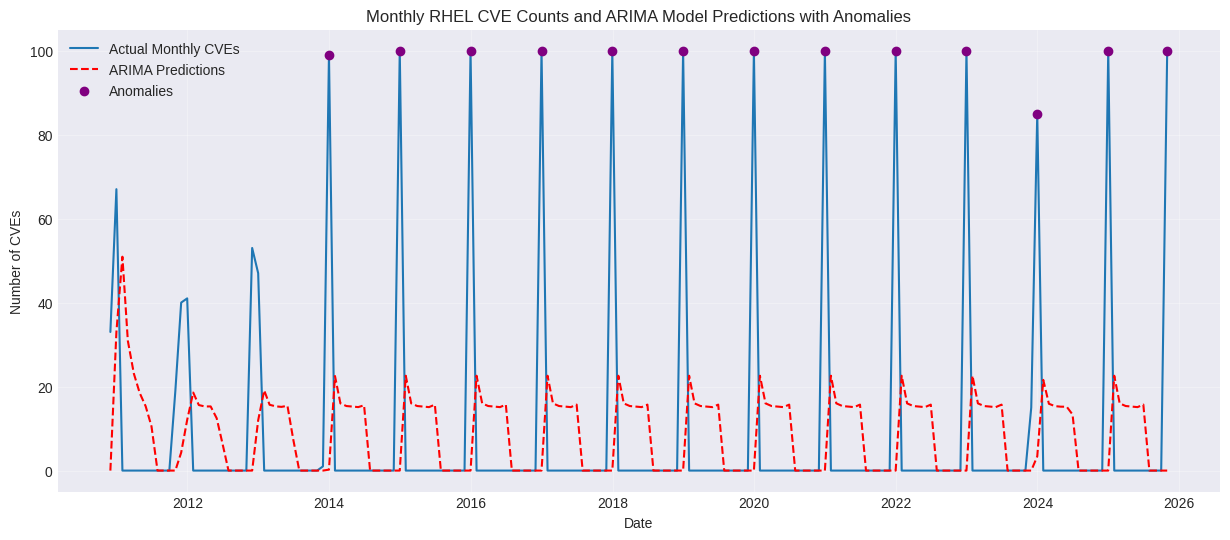

In [33]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Ensure 'public_date' is datetime and set as index for time series analysis
df['public_date'] = pd.to_datetime(df['public_date'], errors='coerce')
df.dropna(subset=['public_date'], inplace=True) # Drop rows with invalid dates
df_ts = df.set_index('public_date').sort_index()

# Aggregate data by month to create a time series of CVE counts
monthly_cve_counts = df_ts.resample('M').size().fillna(0)

print("\nMonthly CVE Counts (Time Series):")
display(monthly_cve_counts.head())

# Check for stationarity using the Augmented Dickey-Fuller test
# A p-value > 0.05 suggests non-stationarity
result = adfuller(monthly_cve_counts)
print(f'\nADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value is high, differencing might be needed. For simplicity, we'll proceed assuming
# or demonstrating with the original series, but in a real scenario, you'd difference if needed.

# Fit an ARIMA model
# This is a basic example; model order (p,d,q) would typically be determined through
# ACF/PACF plots or auto_arima
order = (5, 1, 0) # Example order: (p, d, q)
try:
    model = ARIMA(monthly_cve_counts, order=order)
    model_fit = model.fit()
    print(model_fit.summary())

    # Generate predictions (in-sample for demonstration)
    predictions = model_fit.predict(start=0, end=len(monthly_cve_counts)-1)

    # Calculate residuals (actual - predicted)
    residuals = monthly_cve_counts - predictions

    # Identify anomalies based on residuals (e.g., residuals outside a certain standard deviation)
    scaler = StandardScaler()
    scaled_residuals = scaler.fit_transform(residuals.values.reshape(-1, 1))
    anomaly_threshold = 2 # Anomalies outside 2 standard deviations

    # Find the dates where the absolute scaled residual exceeds the threshold
    anomalies_dates = monthly_cve_counts.index[np.abs(scaled_residuals).flatten() > anomaly_threshold]

    print(f"\nIdentified Anomalies (Dates with high residual):")
    if not anomalies_dates.empty:
        for date in anomalies_dates:
            print(date.strftime('%Y-%m'))
    else:
        print("No significant anomalies detected based on the threshold.")


    # Visualize the time series, predictions, and anomalies
    plt.figure(figsize=(15, 6))
    plt.plot(monthly_cve_counts.index, monthly_cve_counts, label='Actual Monthly CVEs')
    plt.plot(predictions.index, predictions, color='red', linestyle='--', label='ARIMA Predictions')
    plt.scatter(anomalies_dates, monthly_cve_counts.loc[anomalies_dates], color='purple', label='Anomalies', zorder=5)
    plt.title('Monthly RHEL CVE Counts and ARIMA Model Predictions with Anomalies')
    plt.xlabel('Date')
    plt.ylabel('Number of CVEs')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

except Exception as e:
    print(f"Error fitting ARIMA model or analyzing anomalies: {e}")
    print("Consider adjusting the ARIMA order or checking the data for issues.")

In [34]:
print("\n" + "="*80)
print("SECTION 5: INVESTIGATING ANOMALIES")
print("="*80)


SECTION 5: INVESTIGATING ANOMALIES


In [35]:
# Convert anomalies_dates to a list of strings in 'YYYY-MM' format for easier filtering
anomalous_months_str = [date.strftime('%Y-%m') for date in anomalies_dates]

# Ensure 'year_month' column in df is also in 'YYYY-MM' string format
df['year_month_str'] = df['year_month'].astype(str)

# Filter the original DataFrame for the rows that fall within the anomalous months
anomalous_cves_df = df[df['year_month_str'].isin(anomalous_months_str)].copy()

print(f"\nFound {len(anomalous_cves_df)} CVEs in the identified anomalous months.")

# Display the head of the filtered DataFrame
print("\nSample of CVEs in anomalous months:")
display(anomalous_cves_df.head())


Found 1284 CVEs in the identified anomalous months.

Sample of CVEs in anomalous months:


,CVE,severity,public_date,advisories,bugzilla,bugzilla_description,cvss_score,cvss_scoring_vector,CWE,affected_packages,package_state,resource_url,cvss3_scoring_vector,cvss3_score,asb_domain,year_month,package_family,severity_rank,year_month_str
300,CVE-2014-1447,moderate,2013-12-31 00:00:00+00:00,[RHSA-2014:0103],1052957,libvirt: denial of service with keepalive,3.3,AV:A/AC:L/Au:N/C:N/I:N/A:P,None,['libvirt-0:0.10.2-29.el6_5.3'],None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN,Other,2013-12,libvirt-0:0.10.2-29.el6_5.3,NaN,2013-12
301,CVE-2014-1690,low,2013-12-31 00:00:00+00:00,[RHSA-2014:0439],1058748,Kernel: netfilter: nf_nat: leakage of uninitia...,2.6,AV:N/AC:H/Au:N/C:P/I:N/A:N,None,['kernel-rt-0:3.10.33-rt32.33.el6rt'],None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN,PV - Posture & Vulnerability,2013-12,kernel-rt-0:3.10.33-rt32.33.el6rt,NaN,2013-12
302,CVE-2014-1438,moderate,2013-12-30 00:00:00+00:00,[RHSA-2014:0439],1052914,kernel: x86: exceptions are not cleared in AMD...,4.7,AV:L/AC:M/Au:N/C:N/I:N/A:C,None,['kernel-rt-0:3.10.33-rt32.33.el6rt'],None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN,PV - Posture & Vulnerability,2013-12,kernel-rt-0:3.10.33-rt32.33.el6rt,NaN,2013-12
303,CVE-2013-7338,moderate,2013-12-27 00:00:00+00:00,[],1078014,python: malformed ZIP files could cause 100% C...,4.3,AV:N/AC:M/Au:N/C:N/I:N/A:P,None,[],None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN,Other,2013-12,Unknown Package,NaN,2013-12
304,CVE-2013-4969,low,2013-12-26 00:00:00+00:00,[],1045212,Puppet: Unsafe use of Temp files in File type,2.1,AV:L/AC:L/Au:N/C:N/I:N/A:P,CWE-377,[],None,https://access.redhat.com/hydra/rest/securityd...,NaN,NaN,Other,2013-12,Unknown Package,NaN,2013-12


In [36]:
# Analyze severity distribution in anomalous months
print("\nSeverity distribution in anomalous months:")
print(anomalous_cves_df['severity'].value_counts())


Severity distribution in anomalous months:
severity
moderate     697
low          339
important    171
critical      63
Name: count, dtype: int64


In [37]:
# Analyze the most affected package families in anomalous months
print("\nTop 10 most affected package families in anomalous months:")
# Use the 'package_family' column which we created earlier
print(anomalous_cves_df['package_family'].value_counts().head(10))


Top 10 most affected package families in anomalous months:
package_family
Unknown Package                                    735
flash-plugin-0:11.2.202.559-1.el6_7                 20
flash-plugin-0:24.0.0.186-1.el6_8                   17
openshift-logging/elasticsearch6-rhel8:v5.0.3-1     14
webkitgtk4-0:2.48.3-2.el7_9                         13
chromium-browser-0:71.0.3578.80-1.el6_10            13
thunderbird-0:115.6.0-1.el8_4                       11
thunderbird-0:91.4.0-3.el7_9                        11
unbound-0:1.7.3-15.el8                              10
webkit2gtk3-0:2.38.5-1.el9                           8
Name: count, dtype: int64


In [38]:
# Analyze term frequency in descriptions for anomalous months
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)

def analyze_term_frequency_anomalies(df: pd.DataFrame, column: str, num_terms: int = 20):
    """
    Analyzes the frequency of terms in a specified column of a DataFrame,
    specifically for the anomalous CVEs.
    """
    if df.empty or column not in df.columns:
        print(f"⚠️ DataFrame is empty or column '{column}' not found.")
        return

    text = ' '.join(df[column].astype(str).tolist()).lower()
    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = text.split()

    # Remove stopwords and custom stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = {'redhat', 'red', 'hat', 'enterprise', 'linux', 'el', 'cve', 'fix', 'issues', 'multiple'}
    all_stopwords = stop_words.union(custom_stopwords)
    filtered_words = [word for word in words if word not in all_stopwords and len(word) > 1]

    # Count term frequency
    term_counts = Counter(filtered_words)

    print(f"\nTop {num_terms} terms in '{column}' for anomalous CVEs:")
    for term, count in term_counts.most_common(num_terms):
        print(f"  {term}: {count}")

# Analyze term frequency in descriptions for anomalous months
analyze_term_frequency_anomalies(anomalous_cves_df, 'bugzilla_description')

# Analyze term frequency in affected packages for anomalous months
analyze_term_frequency_anomalies(anomalous_cves_df, 'affected_packages')


Top 20 terms in 'bugzilla_description' for anomalous CVEs:
  kernel: 345
  overflow: 132
  buffer: 128
  memory: 116
  function: 101
  code: 94
  execution: 87
  mozilla: 78
  null: 76
  pointer: 76
  imagemagick: 76
  via: 73
  dereference: 70
  file: 67
  leak: 65
  outofbounds: 64
  useafterfree: 64
  crash: 63
  service: 59
  denial: 58

Top 20 terms in 'affected_packages' for anomalous CVEs:
  webkitgtk4024832el79: 26
  flashplugin01122025591el67: 20
  flashplugin01122025591el5: 20
  flashplugin024001861el68: 17
  openshiftloggingelasticsearch6rhel8v5031: 14
  openshift4oseloggingelasticsearch6v460202104161407p0: 14
  chromiumbrowser07103578801el610: 13
  webkit2gtk3023461el8: 13
  qemukvm1015360el705: 11
  qemukvmrhev1015360el707: 11
  thunderbird091403el79: 11
  thunderbird091402el82: 11
  thunderbird091402el84: 11
  thunderbird091402el85: 11
  thunderbird091402el81: 11
  thunderbird0115601el84: 11
  thunderbird0115601el93: 11
  thunderbird0115601el86: 11
  thunderbird0115601el

In [39]:
print("\n" + "="*80)
print("SECTION 6: INVESTIGATING 'Unknown Package' ANOMALIES")
print("="*80)


SECTION 6: INVESTIGATING 'Unknown Package' ANOMALIES


In [40]:
# Filter for CVEs in anomalous months categorized as 'Unknown Package'
unknown_package_anomalies_df = anomalous_cves_df[anomalous_cves_df['package_family'] == 'Unknown Package'].copy()

print(f"\nFound {len(unknown_package_anomalies_df)} CVEs in anomalous months categorized as 'Unknown Package'.")

# Display sample of these CVEs
print("\nSample of 'Unknown Package' CVEs in anomalous months:")
display(unknown_package_anomalies_df[['CVE', 'severity', 'bugzilla_description', 'affected_packages']].head())


Found 735 CVEs in anomalous months categorized as 'Unknown Package'.

Sample of 'Unknown Package' CVEs in anomalous months:


,CVE,severity,bugzilla_description,affected_packages
303,CVE-2013-7338,moderate,python: malformed ZIP files could cause 100% C...,[]
304,CVE-2013-4969,low,Puppet: Unsafe use of Temp files in File type,[]
305,CVE-2014-1829,low,python-requests: redirect can expose netrc pas...,[]
306,CVE-2014-1830,low,python-requests: Proxy-Authorization header leak,[]
309,CVE-2013-7443,low,sqlite: array overrun in the skip-scan optimiz...,[]


In [41]:
# Analyze term frequency in bugzilla_description for 'Unknown Package' anomalies
analyze_term_frequency_anomalies(unknown_package_anomalies_df, 'bugzilla_description', num_terms=30)

# Analyze term frequency in affected_packages for 'Unknown Package' anomalies (though this might be less informative if the package name is truly unknown)
analyze_term_frequency_anomalies(unknown_package_anomalies_df, 'affected_packages', num_terms=30)


Top 30 terms in 'bugzilla_description' for anomalous CVEs:
  kernel: 275
  function: 77
  memory: 72
  buffer: 72
  overflow: 71
  imagemagick: 70
  leak: 54
  crash: 54
  null: 54
  pointer: 53
  file: 51
  wireshark: 48
  dereference: 47
  dissector: 37
  via: 33
  qemu: 32
  heap: 32
  heapbased: 30
  binutils: 30
  denial: 29
  service: 29
  handling: 29
  read: 28
  code: 28
  check: 26
  outofbounds: 26
  useafterfree: 26
  dos: 25
  xen: 23
  error: 23

Top 30 terms in 'affected_packages' for anomalous CVEs:


In [42]:
print("\n" + "="*80)
print("SECTION A: APPLYING AI IN GENERATING REPORT")
print("="*80)


SECTION A: APPLYING AI IN GENERATING REPORT


In [43]:
# Install the python-dotenv library to load environment variables from a .env file
!pip install python-dotenv -q

In [44]:
import dotenv
import os
import google.generativeai as genai

In [45]:
# Load environment variables from the .env file
dotenv.load_dotenv()

# Now you can access the environment variable
try:
    gemini_api_key = os.getenv("GEMINI_API_KEY")
    if not gemini_api_key:
        raise ValueError("GEMINI_API_KEY environment variable not set after loading .env")
    genai.configure(api_key=gemini_api_key)
    gemini_model = genai.GenerativeModel("gemini-2.5-flash")
    response = gemini_model.generate_content("Hello Gemini, reply 'OK' if working.")
    print(response.text)
    print("Gemini API configured successfully.")
except ValueError as e:
    print(f"Error configuring Gemini API: {e}")
except Exception as e:
    print(f"An unexpected error occurred during Gemini API setup: {e}")

OK
Gemini API configured successfully.


In [46]:
def generate_report_with_gemini(df: pd.DataFrame, anomalous_cves_df: pd.DataFrame, confirmed_vulnerable_assets_df: pd.DataFrame, kernel_vulnerabilities_df_sorted: pd.DataFrame, anomaly_dates: list) -> str:
    """
    Generates a comprehensive report based on the RHEL security analysis using Gemini.

    Args:
        df: The main DataFrame containing all CVE data.
        anomalous_cves_df: DataFrame filtered for CVEs in anomalous months.
        confirmed_vulnerable_assets_df: DataFrame of identified vulnerable assets.
        kernel_vulnerabilities_df_sorted: DataFrame of kernel-related vulnerabilities, sorted by date.
        anomaly_dates: List of dates identified as anomalous months.

    Returns:
        A markdown formatted string containing the generated report.
    """
    print("\n Generating comprehensive report using Gemini...")

    # Prepare key insights and data summaries
    total_cves = len(df)
    asb_distribution = df['asb_domain'].value_counts().to_string()
    anomalous_months_str = [date.strftime('%Y-%m') for date in anomaly_dates]
    anomalous_cve_count = len(anomalous_cves_df)
    anomalous_severity_distribution = anomalous_cves_df['severity'].value_counts().to_string()
    unknown_package_anomalies_count = len(anomalous_cves_df[anomalous_cves_df['package_family'] == 'Unknown Package'])
    kernel_vulnerability_count = len(kernel_vulnerabilities_df_sorted)
    vulnerable_asset_count = len(confirmed_vulnerable_assets_df['Asset ID'].unique())
    vulnerable_asset_summary = confirmed_vulnerable_assets_df.groupby('Asset ID').size().reset_index(name='Number of Vulnerabilities').to_string(index=False)


    prompt = f"""
    You are a security analyst AI. Generate a comprehensive report based on the provided RHEL security vulnerability analysis findings.
    The report should be in markdown format and cover the key sections of the analysis.

    Here are the key findings and data summaries from the analysis:

    Overall CVE Data:
    - Total CVEs analyzed: {total_cves}
    - Distribution by ASB v3 Control Domain:\n{asb_distribution}

    Anomaly Analysis:
    - Anomalous months identified (based on time series modeling): {', '.join(anomalous_months_str)}
    - Total CVEs in anomalous months: {anomalous_cve_count}
    - Severity distribution in anomalous months:\n{anomalous_severity_distribution}
    - Number of 'Unknown Package' CVEs in anomalous months: {unknown_package_anomalies_count}

    Specific Vulnerability Areas:
    - Total kernel-related vulnerabilities found: {kernel_vulnerability_count}
    - Top 5 recent kernel vulnerabilities (based on analysis results, summarize key details):
      {kernel_vulnerabilities_df_sorted[['CVE', 'severity', 'public_date', 'bugzilla_description']].head().to_string(index=False)}

    Vulnerable Asset Analysis:
    - Total assets with confirmed vulnerabilities: {vulnerable_asset_count}
    - Summary of vulnerabilities per asset:\n{vulnerable_asset_summary}
    - Sample of confirmed vulnerable assets with package details (based on analysis results, summarize key details):
      {confirmed_vulnerable_assets_df[['Asset ID', 'Vulnerable Package Name', 'Asset Package Version', 'Known Vulnerable Version (from CVE data)']].head().to_string(index=False)}

    Structure the report as follows:

    # RHEL Security Vulnerability Analysis Report

    ## 1. Executive Summary
    - Briefly summarize the purpose of the analysis and the key findings (overall trends, anomalies, vulnerable assets).

    ## 2. Overall RHEL Security Landscape
    - Discuss the total number of CVEs and the distribution across ASB v3 control domains. Highlight the most prominent domains.
    - Mention the time range of the data.

    ## 3. Anomaly Detection in Release Patterns
    - Explain the time series analysis and the identified anomalous months.
    - Discuss the characteristics of vulnerabilities in these anomalous periods (severity, common package families if notable from analysis).
    - Mention the investigation into 'Unknown Package' anomalies during these periods and what that revealed (e.g., common underlying issues).

    ## 4. Key Vulnerability Areas
    - Highlight specific areas of concern based on the analysis, such as kernel vulnerabilities.
    - Provide details on the number of kernel vulnerabilities found and mention the most recent critical/important ones if applicable from the analysis output.

    ## 5. Vulnerable Asset Posture
    - Summarize the findings from the asset vulnerability check.
    - State the number of assets found to be vulnerable and which assets have the highest number of associated vulnerabilities.
    - Provide a sample of identified vulnerable assets and the package versions.

    ## 6. Recommendations
    - Based on the findings, provide actionable recommendations (e.g., prioritize patching for high-severity CVEs and vulnerable assets, investigate anomaly causes, refine package inventory).

    ## 7. Conclusion
    - Briefly summarize the report and next steps.

    Ensure the language is professional and informative. Do not include any code or placeholders for images. Refer to the provided data summaries directly in the text.
    """

    try:
        response = gemini_model.generate_content(prompt)
        report_text = response.text.strip()
        print("✓ Report generated successfully.")
        return report_text
    except Exception as e:
        print(f"Error generating report with Gemini: {e}")
        return "Error generating report."

# Assuming 'df', 'anomalous_cves_df', 'confirmed_vulnerable_assets_df', 'kernel_vulnerabilities_df_sorted', and 'anomalies_dates'
# are available from previous cell executions.
# If not, ensure these variables are defined or loaded before calling this function.

# Generate the report
report_markdown = generate_report_with_gemini(df, anomalous_cves_df, confirmed_vulnerable_assets_df, kernel_vulnerabilities_df_sorted, anomalies_dates)

# Print the generated markdown report
print(report_markdown)


 Generating comprehensive report using Gemini...
✓ Report generated successfully.
# RHEL Security Vulnerability Analysis Report

## 1. Executive Summary

This report provides a comprehensive analysis of Red Hat Enterprise Linux (RHEL) security vulnerabilities based on a dataset of 1600 CVEs. The analysis identified key trends, recurring anomalies in vulnerability release patterns, significant areas of concern such as kernel vulnerabilities, and a list of confirmed vulnerable assets within the environment. A major finding is the high concentration of vulnerabilities within the Posture & Vulnerability (PV) control domain and a consistent December spike in vulnerability disclosures. The report outlines actionable recommendations to enhance the organization's security posture against these identified threats.

## 2. Overall RHEL Security Landscape

A total of 1600 Common Vulnerabilities and Exposures (CVEs) were analyzed, spanning a period indicated by the identified anomalous months from

In [47]:
def get_remediation_advice_from_gemini(cve_details: dict) -> str:
    """
    Calls Gemini API to get remediation advice, prevention methods,
    and general security improvement tips for a given CVE.

    Args:
        cve_details: A dictionary containing details about the CVE,
                     e.g., {'CVE': 'CVE-XXXX-XXXX', 'severity': '...',
                           'description': '...', 'affected_packages': '...'}.

    Returns:
        A markdown formatted string containing the generated advice,
        or an error message.
    """
    print(f"\nGenerating remediation advice for {cve_details.get('CVE', 'a vulnerability')} using Gemini...")

    prompt = f"""
    You are a security expert providing advice on how to remediate, prevent, and improve asset security related to a specific vulnerability.
    Based on the following vulnerability details, provide actionable guidance.

    Vulnerability Details:
    - CVE ID: {cve_details.get('CVE', 'N/A')}
    - Severity: {cve_details.get('severity', 'N/A')}
    - Description: {cve_details.get('description', 'N/A')}
    - Affected Packages: {cve_details.get('affected_packages', 'N/A')}

    Please provide the following in markdown format:

    ## Remediation (How to fix it)
    - Provide specific steps or general guidance on how to fix this vulnerability.

    ## Prevention (How to avoid similar issues)
    - Suggest methods or practices to prevent this type of vulnerability from occurring in the future.

    ## Asset Security Improvement (General tips)
    - Offer broader recommendations to enhance the security posture of assets potentially affected by this type of vulnerability.

    Ensure the advice is practical and easy to understand.
    """

    try:
        # Assuming 'gemini_model' is already initialized from a previous cell
        response = gemini_model.generate_content(prompt)
        remediation_advice = response.text.strip()
        print("✓ Remediation advice generated successfully.")
        return remediation_advice
    except Exception as e:
        print(f"Error generating remediation advice with Gemini: {e}")
        return "Error generating remediation advice."

print("Function 'get_remediation_advice_from_gemini' defined.")

Function 'get_remediation_advice_from_gemini' defined.


In [ ]:
# Select a specific asset ID to get advice for (you can change 'asset1' to any other asset ID)
asset_to_investigate = 'asset1'

# Filter the confirmed_vulnerable_assets_df for this asset
asset_vulnerabilities = confirmed_vulnerable_assets_df[
    confirmed_vulnerable_assets_df['Asset ID'] == asset_to_investigate
].copy()

if not asset_vulnerabilities.empty:
    print(f"\nRemediation advice for Asset ID: {asset_to_investigate}")

    # Ensure 'main_package_name' exists in asset_vulnerabilities_df
    if 'main_package_name' not in asset_vulnerabilities.columns:
         # This should not happen if the previous cell executed correctly, but as a safeguard:
         def extract_main_package_name(package_name):
            if isinstance(package_name, str):
                match = re.match(r'([^0-9:\-]+)', package_name)
                if match:
                    return match.group(1).strip()
                parts = re.split(r'[:\-]', package_name)
                if parts:
                    return parts[0].strip()
            return None
         asset_vulnerabilities['main_package_name'] = asset_vulnerabilities['Vulnerable Package Name'].apply(extract_main_package_name)

    # Recreate 'main_package_name' in df if it was dropped
    if 'main_package_name' not in df.columns:
         def extract_main_package_name_from_family(package_family):
             if isinstance(package_family, str):
                if package_family in ['Unknown Package', '', '[]', 'None']:
                    return None
                match = re.match(r'([^0-9:\-]+)', package_family)
                if match:
                    return match.group(1).strip()
                parts = re.split(r'[:\-]', package_family)
                if parts:
                    return parts[0].strip()
             return None
         df['main_package_name'] = df['package_family'].apply(extract_main_package_name_from_family)

    asset_vulnerabilities_with_cves = pd.merge(
        asset_vulnerabilities,
        df[['CVE', 'severity', 'bugzilla_description', 'main_package_name']].drop_duplicates(subset=['CVE']), # Drop duplicate CVE rows in df
        on='main_package_name',
        how='left'
    )

    asset_vulnerabilities_with_cves = asset_vulnerabilities_with_cves.drop(columns=['main_package_name'], errors='ignore')
    asset_vulnerabilities_with_cves_unique_cve = asset_vulnerabilities_with_cves.drop_duplicates(subset=['CVE'])


    # Iterate through the unique vulnerabilities found for this asset and get advice for each
    if not asset_vulnerabilities_with_cves_unique_cve.empty:
      for index, row in asset_vulnerabilities_with_cves_unique_cve.iterrows():
          # Ensure CVE and description are available before calling the function
          if pd.notna(row['CVE']) and pd.notna(row['bugzilla_description']):
              cve_details = {
                  'CVE': row['CVE'],
                  'severity': row['severity'] if pd.notna(row['severity']) else 'N/A',
                  'description': row['bugzilla_description'],
                  'affected_packages': row['Vulnerable Package Name'] # Use the specific package name from the asset
              }

              advice = get_remediation_advice_from_gemini(cve_details)
              print(advice)
              print("\n" + "-"*50 + "\n") # Separator for multiple vulnerabilities on an asset
          else:
              print(f"\nSkipping advice for a vulnerability on Asset ID {asset_to_investigate} due to missing CVE or description.")


else:
    print(f"\nNo confirmed vulnerabilities found for Asset ID: {asset_to_investigate}.")


Remediation advice for Asset ID: asset1

Generating remediation advice for CVE-2016-0736 using Gemini...
✓ Remediation advice generated successfully.
As a security expert, here's actionable guidance to remediate, prevent, and improve asset security related to CVE-2016-0736.

## Remediation (How to fix it)

This vulnerability is a Padding Oracle attack in Apache's `mod_session_crypto` module, affecting Apache HTTP Server versions 2.4.1 to 2.4.18. The listed affected package `jbcs-httpd24-mod_jk-0:1.2.48` indicates a JBoss Core Services (JBCS) environment where `mod_jk` might be used alongside an affected Apache `httpd` version.

1.  **Identify Affected Systems:**
    *   Inventory all Apache HTTP Server instances in your environment.
    *   Specifically look for `httpd` installations based on Red Hat JBoss Core Services (JBCS) and determine their exact versions.
    *   Verify if `mod_session_crypto` is enabled or if the server is within the vulnerable version range (Apache HTTP Serve

In [ ]:
# def get_asb_domain_from_gemini(cve_description: str, affected_packages: str) -> str:
#     """
#     Calls Gemini API to categorize a CVE based on its description and affected packages.
#     """
#     prompt = f"""
#     Categorize the following Red Hat Enterprise Linux vulnerability based on its description and affected packages into one of the following Azure Security Benchmark v3 control domains. Prioritize fitting it into one of the specific domains before categorizing as 'Other'.

#     - IM - Identity Management
#     - PV - Posture & Vulnerability Management
#     - LT - Logging & Threat Detection
#     - NS - Network Security
#     - DP - Data Protection
#     - Other

#     Vulnerability Description: {cve_description}
#     Affected Packages: {affected_packages}

#     Return only the ASB v3 control domain name (e.g., "IM - Identity Management", "PV - Posture & Vulnerability Management", "Other").
#     """

#     try:
#         response = gemini_model.generate_content(prompt)
#         domain = response.text.strip()

#         valid_domains = [
#             'IM - Identity Management',
#             'PV - Posture & Vulnerability Management',
#             'LT - Logging & Threat Detection',
#             'NS - Network Security',
#             'DP - Data Protection',
#             'Other'
#         ]

#         if domain in valid_domains:
#             print(f"Categorized: {domain}")
#             return domain
#         else:
#             print(f"Warning: Unexpected domain received from Gemini: {domain}. Categorizing as Other.")
#             return 'Other'

#     except Exception as e:
#         print(f"Error calling Gemini API: {e}")
#         return 'Other'

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# batch_size = 100
# results = []

# for i in tqdm(range(0, len(df), batch_size)):
#     chunk = df.iloc[i:i+batch_size]
#     cve_rows = list(zip(chunk['bugzilla_description'], chunk['affected_packages'].astype(str)))
#     batch_result = get_asb_domains_batch(cve_rows)
#     results.extend(batch_result)

# df['asb_domain_gpt'] = results

In [ ]:
# def categorize_cve_with_agent(cve_description: str, affected_packages: str) -> str:
#     """
#     Categorizes a CVE based on its description and affected packages using a Langchain agent
#     with web search and an LLM, mapping it to an Azure Security Benchmark v3 domain.
#     """
#     prompt = f"""
#     Analyze the following Red Hat Enterprise Linux vulnerability and categorize it into one of the following Azure Security Benchmark v3 control domains:

#     - IM - Identity Management
#     - PV - Posture & Vulnerability Management
#     - LT - Logging & Threat Detection
#     - NS - Network Security
#     - DP - Data Protection
#     - Other

#     Use web search to find relevant information about the CVE, its potential impact, and the nature of the affected packages.
#     Based on your findings and the provided ASB domains, determine the most appropriate category. If the vulnerability clearly fits multiple domains, choose the one that seems most prominent. If you cannot definitively categorize it into one of the specific domains, categorize it as 'Other'.

#     Vulnerability Description: {cve_description}
#     Affected Packages: {affected_packages}

#     Provide your reasoning and finally state the chosen ASB v3 control domain clearly on a new line, prefixed with "Category: ".
#     """

#     try:
#         print(f"Categorizing CVE with agent: {cve_description[:50]}...")
#         agent_response = agent.run(prompt)
#         print(f"Agent Response: {agent_response[:200]}...") # Print a snippet of the response

#         # Attempt to extract the category from the agent's response
#         # Look for the line starting with "Category: "
#         category_line = next((line for line in agent_response.splitlines() if line.startswith("Category: ")), None)

#         if category_line:
#             domain = category_line.replace("Category: ", "").strip()
#             valid_domains = {
#                 'IM - Identity Management',
#                 'PV - Posture & Vulnerability Management',
#                 'LT - Logging & Threat Detection',
#                 'NS - Network Security',
#                 'DP - Data Protection',
#                 'Other'
#             }
#             if domain in valid_domains:
#                 print(f"Successfully categorized as: {domain}")
#                 return domain
#             else:
#                 print(f"Warning: Extracted domain '{domain}' is not a valid ASB domain. Returning 'Other'.")
#                 return 'Other'
#         else:
#             print("Warning: Could not find 'Category: ' in agent response. Returning 'Other'.")
#             return 'Other'

#     except Exception as e:
#         print(f"Error running agent for categorization: {e}")
#         return 'Other'

# print("Function 'categorize_cve_with_agent' defined.")

In [ ]:
# batch_size = 100
# results = []

# for i in tqdm(range(0, len(df), batch_size)):
#     chunk = df.iloc[i:i+batch_size].copy() # Create a copy to avoid SettingWithCopyWarning
#     cve_rows = list(zip(chunk['bugzilla_description'], chunk['affected_packages'].astype(str)))
#     batch_result = []
#     for desc, pkgs in cve_rows:
#       batch_result.append(categorize_cve_with_agent(desc, pkgs))

#     results.extend(batch_result)

# df['asb_domain_langchain_agent'] = results

# # Display the first few rows with the new column
# display(df[['CVE', 'bugzilla_description', 'affected_packages', 'asb_domain_langchain_agent']].head())

# # Display the distribution of the new ASB domains
# print("\nASB Domain Distribution (from Langchain Agent):")
# print(df['asb_domain_langchain_agent'].value_counts())